imports

In [1]:
from __future__ import print_function, division
from builtins import range

import os
import sys,re
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, GlobalMaxPool1D, Bidirectional, Conv1D
from tensorflow.keras.layers import LSTM, MaxPooling1D, Embedding, Dropout, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
from sklearn.metrics import roc_auc_score

some configuration

In [2]:
MAX_SEQUENCE_LENGTH = 200
MAX_VOCAB_SIZE = 30000
EMBEDDING_DIM = 50
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 100
EPOCHS = 8

load in pre-trained word vectors

In [3]:
word2vec = {}
with open(os.path.join('/home/hassan/Documents/machine_learning_examples/nlp_class3/glove.6B.%sd.txt' % EMBEDDING_DIM)) as f:
  # is just a space-separated text file in the format:
  # word vec[0] vec[1] vec[2] ...
  for line in f:
    values = line.split()
    word = values[0]
    vec = np.asarray(values[1:], dtype='float32')
    word2vec[word] = vec


In [4]:
print('Found %s word vectors.' % len(word2vec))

Found 400000 word vectors.


prepare text samples and their labels

In [7]:
words = np.empty(0,dtype='object')
targets = np.zeros(0)
labels = { "ArtOrDet":1,"Nn":2,"Vt":3,"Prep":4,"Vform":5,"Wform":6,"SVA":7 }
i=0
f=open('/home/hassan/Documents/machine_learning_examples/nlp_class3/toxic/conll14st-preprocessed.m2')
line = f.readline()
while line:
    line = line.strip()
    if line:
        if re.search("^S",line):
            print(line)
            line = line[2:]
            lenline = len(line.split())
            a=np.array(line.split(),dtype='object')
            words=np.concatenate([words,a])
            b=np.zeros(lenline)
            targets=np.concatenate([targets,b])
            i = i + lenline
        elif re.search("^A",line):
            # print("found annotation")
            for key in labels:
                # print(labels.get(key))
                if re.search(key,line) and lenline>int(line[2:4]):
                    # print(labels.get(key))
                    targets[i-lenline+int(line[2:4])]=int(labels.get(key))
                    #print(words)
                    #print(targets)
                    break
    line=f.readline()



S CREATING A HABITABLE ENVIRONMENT
S Humans have many basic needs and one of them is to have an environment that can sustain their lives .
S Our current population is 6 billion people and it is still growing exponentially .
S This will , if not already , caused problems as there are very limited spaces for us .
S The solution can be obtain by using technology to achieve a better usage of space that we have and resolve the problems in lands that inhospitable such as desserts and swamps .
S Some countries are having difficulties in managing a place to live for their citizen as they tend to get overpopulated .
S This caused problem like the appearance of slums which most of the time is not safe due to the unhealthy environment .
S The only way to satisfy the increasing demands of space is by achieving a better usage of the land like designing taller building so it can accommodate more number of people with the same spaces .
S It is also important to create a better material that can suppo

S { International Energy Agency } [ HYPERLINK : http : //en.wikipedia.org/wiki/International_Energy_Agency ] .
S Retrieved 4 September 2009 from { http : //www.iea.org/textbase/nppdf/free/2007/key_stats_2007.pdf } [ HYPERLINK : http : //www.iea.org/textbase/nppdf/free/2007/key_stats_2007.pdf ] .
S Khandani .
S S. ( 2005 ) .
S Engineering Design Process .
S Retrieved 29 June , 2009 from http : //www.iisme.org/etp/HS % 20Engineering- % 20Engineering.pdf
S Technologies are always developed to cater certain needs of people , whether to provide better methods of doing things or to develop tools that facilitate working and living .
S Technologies are also consistently refined to meet changing needs of customers .
S This also applies to virtual technology , which was developed under a specific social and technological background and was evolved to meet increasing needs under a changing environment .
S Virtual technology was first developed to address needs of extensive communications .
S By t

S Even if employees encounter some precious ideas by chance , they may not want to put effort into doing research and converting the ideas into production .
S Thus , the above two impacts will affect the design stage , development stage significantly .
S Since stated-owned enterprises play important roles in controlling and leading other type of enterprises in China , this will hamper China 's design process for innovation from macroscopic view .
S Apart from the loopholes in the system of state-owned enterprises , economic shortage of China 's private companies also hampers the innovation process .
S Unlike state-owned enterprises , private companies have no steady economic support .
S They have to prepare for competition and the possibilities of bankrupt .
S Most of the private companies may also lack funding , equipment and materials for operation and production .
S With regard to the second factor , another two impacts should be considered as well .
S One is the undesirable product

S All these will seriously affect the functionality analysis stage of the design process , as more time and consideration will have to be channeled into this portion .
S One example of a properly located and well-designed amenity would be the Mass Rail transit [ MRT ] stations .
S Some stations are made connected to shopping malls while others to bus interchanges , thereby making transport in Singapore relatively convenient .
S In addition to that , some of these stations like City Hall and Dhoby Ghaut station , not only play the role of an important hub in Singapore 's transport system , but also an internal shopping center within itself .
S City- link , which is connected to city hall station , is an underground network of shops that link itself to other larger shopping facilities .
S Such an example shows how proper planning of the amenities lead to the success of the application .
S In conclusion , being a small country , Singapore has several issues that may affect the design proc

S This is a striking example of how social factors shaped the way people use a technology .
S To conclude , the jet engine has come a long way .
S From its initial usage in killing machines to its function in revolutionizing air travel , the jet engine in use today has been shaped by many social considerations and I certainly believe it will continue to be so in the many futures to come .
S References
S Biography : Sir Frank Whittle ( n.d. ) Answers.com .
S Retrieved September 9 , 2009 , from http : //www.answers.com/topic/frank-whittle
S Crandall , J .
S ( 2007 , April 1 ) .
S The invention of the Jet Engine .
S Suite101 .
S Retrieved September 9 , 2009 , from http : //transport-inventions.suite101.com/article.cfm/the_invention_of_the_jet_engine
S Lyth , P. ( 1975 ) .
S The Jet Engine and the revolution in air travel : Gim me a ticket on an Aeroplane .
S International Economic History Association Web .
S Retrieved September 9 , 2009 , from http : //eh.net/XIIICongress/cd/papers/4Lyth8

S However , some of the unthinkable ideas were not created through research .
S These creations are called serendipitous discoveries .
S Often than not , they are chanced upon when the researchers are researching on something else instead .
S Let us take a closer look at two examples , the electric car as technology that was developed via research and warfarin which was a result of a serendipitous discovery , and find out what are some of their similarities and differences in terms of their popularity , usefulness , production cost , and other usages .
S Both the electric car and warfarin gained in popularity from the moment they were developed .
S The electric cars were heavily marketed when the prototype became available .
S Advertisements were put up in each local newspaper , inviting interested individuals to apply for an opportunity to test-drive the new vehicle .
S The response turned out to be overwhelming .
S According to Rogers E.M. ( 2003 ) , in Sacramento , with a population

S Retrieved September 9 , 2009 , from http : //en.wikipedia.org/wiki/ Technology
S The solution to energy crisis
S As science and technology develops faster and faster nowadays , more and more machines and instruments are created .
S However , machines need energy which is always generated from coal , petrol and so forth .
S As we all know , the resource mentioned above is non-renewable , and it is also limited .
S Then a new problem comes out .
S What if human use up the resource in the world ?
S What can human live on ?
S So , we need to create machines which consume less energy .
S In addition , we also need to find new energy to replace old non renewable resources .
S An energy crisis may break out because people cry for energy but the resources are limited now .
S The step of industrialization becomes faster and faster , so numerous energies are needed .
S As resources consumption increases rapidly and they are limited , there are fewer resources for people to use .
S And the cris

S Apart from the difference in purpose , the conventional innovation products and the one serendipitously discovered also undergo different research and development procedures .
S The conventional products usually go through careful planning stages , making the whole development process well prepared .
S These innovations are usually backed by solid technological background , expertise and sufficient funds .
S GM allocated $ 2 billion for designing , manufacturing and marketing of their electric car IMPACT , after which expert diffusion scholars helped in campaigning for the product throughout the United States .
S Within one year , the first tier of cars was put into mass production .
S On the contrary , when Fleming discovered penicillin mould , he then had to refer his discovery to Charles Thom , an American specialist for further research .
S It took more than 10 years for penicillin to be eventually purified and applied to medical use .
S Lastly , the immediate effectiveness of a 

S The impediment in the way to innovation in China
S In ancient China , there were four great inventions , the gunpowder , printing , the compass and paper making .
S However in modern times , the engineering design developed very slowly .
S Why did this happen ?
S I think there are many reasons .
S In the Qing dynasty , the governing class implemented closed door policy , which made the society stagnated for a long time .
S Then the Cultural Revolution made a deep effect on Chinese society which needed another long time for China to recovery .
S Even nowadays there are still some problems existed which hamper the engineering design process .
S Here we are going to talk about two problems , the examination-oriented education system and the worship of authorities .
S The examination-oriented education , as the name implies , is the education whose purpose is getting high grades in the exam .
S Teachers teach for the exam .
S Students study for the exam .
S This results that students hav

S Since such project involves huge amount of money , investors must be ascertained that their commitment will bring them profit .
S One way of convincing them is to produce physical prototypes where that can feel and scrutinize .
S Secondly , creating models with traditional means is time consuming , which does not make economical sense to businesses .
S Companies are often engaged in a race to unveil their product ahead of their competitors , so as to seize a major share of the marketplace .
S In such situation , time is of essence .
S In consideration of these factors , designers have conceived the 3-D printer , which is capable of speeding up designing process .
S Based on a report in The Economist ( 2009 ) , it now takes Timberland merely ninety minutes to turn a design of a new sole into a model using the 3-D printer , a significant decrease from a week that the process requires in the past .
S The factors that shaped the technological innovation of the 3-D printer discuss thus fa

S Knowledge from past experiences will also help in ensuring a smoother design process .
S In NUS , a team of students from the engineering faculty took part in Formula SAE Race Car Project in 2001 .
S That was the first time engineering students from NUS took part in it .
S Due to the fact that it was their first attempt , they realized that the lack of race car knowledge had hampered their design process , which they did not do well for the competition .
S However , the engineering faculty has built up the race car knowledge after taking part in several annual competitions , and in the recent competition it came in 19th place .
S Therefore , knowledge plays a crucial role in the design process and the lack of it will hamper the design process .
S In summary , the flow of the design process can be hampered by the lack of funds and knowledge .
S In the case of lacking of funds , companies need to find sponsorships to fund the cost of their design process .
S However , knowledge is some

S New York : Free Press .
S As the global economy continues its search for growth , its insatiable appetite for energy has greatly diminished our non-renewable resources .
S Scientists have estimated that given the current global energy consumption , we only have sufficient oil reserves to last us for another 50 years .
S Furthermore , greenhouse emissions produced from the burning of fossil fuels have lead to global warming , with its impact visible from the shrinkage of polar ice caps at the Arctic region as well as the rise in global temperature .
S This could eventually cause flooding of low lying areas as well as food shortages and it paints a bleak picture for our future generation .
S Therefore , the world is turning its head towards 'green ' technology as a solution to the above crisis .
S Research on the 'green ' technology field has started way back in early 1950s , however it has only started to gain momentum recently as its economic and social benefits become more recognise

S As to handle these storage problems , the related areas came out of two solutions .
S One is to use full-scale high-pressure hydrogen tanks for vehicles .
S Another is to use special materials for solid-state hydrogen storage .
S On the one hand , to storage hydrogen under pressure is a rather well-known technique .
S However , the use of hydrogen tanks in vehicles , and in particular the challenge of using very high pressures , require advanced technology .
S It needs to overcome permeation problem and pass cycling tests .
S On the other hand , for solid-state hydrogen storage , it requires materials that can absorb hydrogen quickly and massively .
S Furthermore , there are also certain requirements for their reaction .
S Overall , these two solutions have their own advantages in different aspects ; at the same time , they also have difficulties respectively .
S So as to make these two hydrogen storage schemes feasible , a lot of experiments and tests have been done .
S For the comp

S Social acceptance of renewable energy innovation : An introduction to the concept .
S Engineering design process is the process of coming out with a system to fulfill requirements .
S It is a decision-making process , in which the basic sciences , { mathematics } [ HYPERLINK : http : //en.wikipedia.org/wiki/Mathematics ] , and engineering sciences are applied to convert resources optimally to meet a stated objective .
S Such engineering designs bring technology together to meet human needs .
S One of the many human needs is the security aspect .
S Being secure would generally mean the condition of how one feels protected against harm of any sort .
S Some examples will be the physical , financial and emotional damage from an event .
S The design process comprises the process of defining problems , generating solutions and selecting analyzed solutions , which helps in meeting the need of safety in technology .
S In the initial stage , the process allows engineer to identify the needs a

S It was also very costly to own one .
S Hence , not many people were able to afford a mobile phone in the past .
S However , take a look at today 's society .
S Mobile phones have already become a necessity .
S Almost everyone owns a mobile phone , including a certain percentage of primary school students .
S The phones which people nowadays possess also differs from the past , in terms of functions , design and size .
S All these transformation are brought about due to several factors .
S Firstly , the manufacturers of the modern day mobile phones recognized and acknowledged the problem of phones in the past .
S As quoted by E.M ROGERS in " THE GENERATION OF INNOVATIONS " : " The innovation-development process often begins with recognition of a problem or need .
S " .
S Manufacturers of mobile phones have found out the disadvantages and hassles of the mobile phones in the past .
S As stated earlier , mobile phones back then had no other functions except for making phone calls .
S Hen

S * Khandani , S. , Engineering Design Process , California , 2005 .
S Engineering Design Processes in Building an Efficient Transportation System
S Living in a society with unprecedented material prosperity , human beings are facing severe problems resulted from energy and resource shortage right now .
S In order to sustain a stable development in the next generations , people are paying more and more attention to build up an eco-friendly society which makes energy usage reach an optimum .
S Considering the mass energy wastage in transit around the entire globe , one of the approaches to reduce energy usage is to construct a better transportation system that delivers energy more efficiently .
S In engineering design processes , the steps regarding solution generation , selection and test are of vital importance to build up such an ideal energy transportation system .
S Generating multiple solutions stimulates engineers ' creativity and provides impulsion to originate a technological b

S Smallpox vaccine was first tested by Jenner in 1796 .
S Penicillin was discovered by Fleming in 1928 .
S Both of them are important discoveries in medicine .
S Hundreds of thousands people are saved by these two discoveries .
S There are some similarities as well as differences between these two life-saving discoveries .
S Both smallpox vaccine and penicillin are tremendous discoveries that save people 's lives and they are milestone in medicine that lead people to explore new areas to fight diseases ; however , the procedure of finding these two discoveries and the development of them are different .
S One similarity of smallpox vaccine and penicillin is that they are life-saving discoveries in medicine .
S In the eighteen century before Jenner discovered smallpox vaccine , smallpox was a widespread killer disease .
S Many infants and young children were killed by smallpox at that time .
S ( Scott , 1996 ) After Jenner discovered the smallpox vaccine , the death rate of smallpox was

S Creativity will not stop at one place ; it will move on from time to time to improve the appliances or devices .
S Therefore , it would be more appropriate now if the engineer design process moves toward human health , in terms of biomedical invention such as artificial heart devices .
S Based on Khandani ( 2005 ) , there are five phases of design process which will be elaborated in subsequent paragraphs .
S The first step of defining the problem is very important so that an engineer would not lost on the way finding the solution .
S Therefore , it is necessary to identify the need from this design activity and make a problem statement for the ease of gathering information , choosing a solution and conducting experiment .
S In the case of artificial heart devices , materials used and size may be defined as the problems .
S Next step will be gathering information .
S A survey related to the existence of similar products should be done to prevent any plagiarism issue .
S Finding out th

S However , having been popularity for less than 100 years , Electric vehicles had all disappeared by 1935 ( The History of Electric Vehicles,2009 ) .
S After 65 years , electric cars came back again from America ; however , unfortunately and interestingly , they failed again .
S Rogers indicated in his article " The Generation of Innovations " that the innovation-decision process is very crucial to the adoption of a new technology , because not only technique factors but also economic , political and social factors play an important part .
S Therefore , it is the technique , economic , political and social factors that killed electric cars together .
S Electric cars have a very obvious shortage in their technique design .
S The electric cars invented in 1990 did not have a powerful battery .
S Due to the limitation of its weigh , size and the battery technology , the battery used in the electric cars at that time was limited to a range of 100 miles ( Rogers,2003 ) .
S As a result , th

S Regardless of how technologies are developed , they will definitely benefit people .
S Developing a new technology usually requires plenty of time , therefore creative thinking and innovation is required .
S In addition , luck and coincidence must be presence for the discovery to happen at the right time , right place and to the right person .
S With all these factors , the time taken to develop a new technology will be shorted .
S Reference
S 1 ) The Generation of Innovations ; E.M Rogers , 2003 ; New York : Free Press ( pp 136-158 )
S 2 ) The History of Penicillin ; Mary Bellis ; http : //inventors.about.com/od/pstartinventions/a/Penicillin.htm
S 3 ) Engineering Design Process , Education Transfer Plan ; Seyyed Khandai , Ph.D , 2005
S The Social Factors Determine the Fortune of A New Technology
S Rogers ( 2003 ) brought forward the idea that society is coming to a generation of innovation , which implicates that innovation is gradually becoming the main tasks of various enterprises

S From five aspects - discovery , creativeness , time taken , acceptance of the project by company and also from problem solving - we can see that there are similarities and difference in these two approaches .
S The examples I am using for this essay for serendipitous discovery and developed via research is 3M Post-it pads and Toshiba Laptop respectively .
S One obvious difference is the way it is invented .
S One of the well-known accidental inventions , according to E.M. Rogers ( 1950 ) , happened several decades ago , 3M researcher found a new bonding agent , but decided it was worthless because it did not stick paper very tightly to a surface .
S This failure converted into a successful product when a 3M researcher used the new bonding agent to create " Post-it " .
S As for Toshiba laptop is developed via research , Mizoguchi foresee that portable personal computer can be invented when he visit the United States with an R&D team form Toshiba .
S He was certain to make it came true

S Retrieved Sep 04 , 2009 , from
S http : //www.bookrags.com/research/air-conditioning-woi/
S Khandani , S. ( 2005 ) .
S Engineering design process .
S Retrieved June 29 , 2009 , from
S http : //www.iisme.org/etp/HS % 20Engineering- % 20Engineering.pdf
S Factors that hamper engineering design process in China
S Technology innovation is significant to the world .
S Without it , our society could not have progressed , nor would our life become convenient .
S According to Roster ( 2003 ) , technology innovation development is a process begins with recognition of a problem or need , which arouses research and development activities designed to create an innovation to solve the problem or need .
S Five stages can describe this process : problem , research , development , commercialization diffusion and consequences ( Roster , 2003 ) .
S While , different countries have different way to perform these stages .
S So during the process , they encounter different obstacles , such as political is

S Homeless people suffering from housing issues are mainly attributed to problems of affordability .
S Building proper houses or flats usually require much finance .
S The construction cost bundled with the raw materials for building many homes is something , which the poor can not afford .
S Furthermore , developers have no incentive to carry out projects in these less developed countries , as there is just no market to earn profit from .
S The problem of cost clearly creates more homeless people .
S On being unable to obtain a proper home , squatters are the next and only alternative that the homeless can approach to .
S These make-do houses are built cheaply and improperly on wastelands .
S Being made from waste metal and wood , the durability and safety of the inhabitant are usually compromised .
S These shabby houses have a danger of collapsing with the constant battering of the weather .
S Moreover , health dangers are prevalent when certain waste materials are used in the shelte

S Data generated from RFID tags of individuals could also be abused by the intended receivers such as surveillance officers ( BBC News , 2006 ) , adding on a whole new level of security blight .
S Although a complete ban on RFID is impossible , its usage on individual tracking should be banned as it intrudes our privacy and compromises our security .
S References :
S 1 .
S BBC News .
S ( 2006 , November 2 ) .
S Britain is 'surveillance society' .
S Retrieved September 4 , 2009 , from http : //news.bbc.co.uk/2/hi/uk_news/6108496.stm
S 2 .
S Channel 3000 .
S ( n.d. ) .
S Concerns persist about RFID tracking technology .
S Retrieved September 4 , 2009 , from http : //www.yrfid.com/rfid_reader/Concerns_Persist_About_RFID_Tracking_Techno logy_4036.html
S 3 .
S Ou , G. ( 2007 , September 18 ) .
S Why the ban on mandatory RFID implants should be federal .
S RINF news .
S Retrieved September 4 , 2009 , from http : //rinf.com/alt-news/surveillance-big-brother/why-the-ban-on-mandatory- rfid-impl

S Rennie , J .
S ( 1994 ) .
S Trends in Genetics : Grading the Gene Tests .
S Scientific American .
S P 88-97 .
S Genetic testing is a kind of genetic test which determines the vulnerabilities of an individual to inherit genetic disorders ( U.S National Library of Medicine , 2009 , para .
S 1 ) .
S The results obtained from a genetic test can exclude an alleged genetic condition or help verify if a person is a carrier of the genetic disease or have a chance to develop the genetic disorder in future ( U.S National Library of Medicine , 2009 , para .
S 1 ) .
S Upon testing , the individual requesting genetic testing should not have the final say in whether to reveal the results of such testing ( Norrgard , 2008 , Reproductive and Other Familial Concerns , para .
S 2 ) .
S Family members of the individual requesting genetic testing should also have the rights to know about the results of such testing .
S This is because that they might have a higher risk for developing this genetic diseas

S References
S General Assembly of the United Nations .
S 1948 Dec 10 .
S Universal Declaration of Human Rights : Article 17 [ Internet ] [ cited 2009 Sep 15 ] .
S Available from : { http : //www.un.org/en/documents/udhr/ } [ HYPERLINK : http : //www.un.org/en/documents/udhr/ ]
S Rennie J .
S 1994 June .
S Trends in Genetics : Grading the Gene Tests .
S Scientific American .
S P 88-97 .
S Norrgard K. 2008 .
S Ethics of Genetic Testing : Medical Insurance and Genetic Discrimination .
S In : Scitable [ Internet ] .
S Nature Education [ cited 2009 Sep 15 ] .
S Available from : http : //www.nature.com/scitable/topicpage/Ethics-of-Genetic-Testing-Medical-Insurance-and-651
S Recent years have witnessed the significant growth of surveillance technology such as RFID ( radio-frequency identification ) .
S Along with this growth , many arguments have arisen surrounding the use of RFID on tracking people .
S Many people suggest that the use of surveillance technology ( RFID ) to track people shou

S Retrieved September 11 , 2009 , from http : //www.law.duke.edu/journals/dltr/articles/2002dltr0015.html
S Genetic testing is used to test for genetic disorders , such as Alzheimer 's disease and Huntington 's disease .
S With the test , people are able to understand the conditions of the diseases which they inherited genes from their parents .
S It helps to improve people 's lives .
S While helping the people , there is also an ethical dilemma and social issues arose with it .
S Facing these problems , people who have done the test should have the right to keep the result from others .
S One reason for revealing the result to the family members is that the result is not only applicable to the individual but also to other family members , as they may also have inherited the diseases .
S Even though the individual may have the responsibility to inform the others about the possibility of them inheriting the genes , one should have the right to decide whether to tell .
S The result will 

S Similarly , in 2002 , the Burlington Northern and Santa Fe Railway Company had to pay up to $ 2.2 million to employees who were secretly tested for a genetic variation for a disorder ( Burlington Northern and Santa Fe Railway Company , 2002 ) .
S ( Karen Norrgard , 2008 ) .
S Moreover , forcing the individual to publicize his result will bring about a new caste system where people are grouped according to the genome .
S This group of people will have rights denied from them as they belong to the lower class people .
S Is not it another more sophisticated kind of discrimination ?
S In conclusion , due to the serious impact in one 's life , we should let the individual to decide his revealing genetic results .
S Genetic testing has been widely used in the society of modern times .
S It allows one to know if he has a genetic disorder by doing the test .
S This seems like a good idea but whether to reveal the testing result is a controversy .
S Some may feel that revealing the results ma

S In this case , the person 's families are likely suffering from such diseases and missing the earlier diagnosis in the future , which are mainly caused by the person 's concealment of his testing results .
S Secondly , such concealment will become a source of dispute in marriage .
S For example , if a man 's genetic testing results indicated some pathogenic genes but he got married with a woman without telling her about these results , the woman might feel that she has been cheated after she knew the truth because she did not want to married to a man with gene deficiency .
S In addition , if they already have children and their children also have such pathogenic genes through heredity , who should responsible for these children 's health problems ?
S In conclusion , the individual should not have the final say in whether to reveal the results of genetic testing .
S It is important for individuals to share the results with their families in order to avoid diseases and benefit the whol

S PaddockC .
S 2007 Sept 10 .
S AP Report On RFID Chips And Cancer Raises Concerns .
S Medical News Today [ Internet ] [ cited 2009 Sept 13 ] .
S Available from : http : //www.medicalnewstoday.com/articles/82032.php
S Sieberg D. 2006 Oct 23 .
S Is RFID tracking you ?
S CNN Technology [ Internet ] [ cited 2009 Sept 13 ] .
S Available from : http : //www.cnn.com/2006/TECH/07/10/rfid/
S Genetic testing has enabled people to test for certain genetic diseases , especially those which they might be prone to and thus go for necessary treatments or make necessary arrangements .
S However , it has also led to privacy and confidentiality problems whereby the results of the test have become a topic for debate .
S Making known the results of genetic testing to relevant parties such as employers and even family members can cause ethical and social problems .
S Thus , individuals requesting genetic testing should always have the final say on whether to reveal the test results to a third party .
S Th

S By allowing proper usage of surveillance technology , one could increase the level of security and safekeeping in a country as well as improving work efficiency at a workplace .
S The use of surveillance technology could increase the level of security and safekeeping of a country .
S By using video surveillance technology specifically at appropriate places , it could help the government protect the public more efficiently such as preventing the crimes before it happened ( Gray , 2009 , p.1 ) .
S As reported in the news last year , West Virginia decided to use video surveillance technology on its highways to help in the finding of missing children ( Stump , 2008 , p.1 ) which resulted in one hundred percent recovery of the missing children ( Stump , 2008 , p.2 ) .
S On another side , it can also help improve the work efficiency at a workplace , more commonly in office work settings .
S In an office set-up , the atmosphere is created by separating employees into cubicles .
S The cubicl

S Bogonikolos Nikos .
S Development of surveillance technology and risk of abuse of economic information .
S [ Internet ] May 1999 [ cited 2009 Sept 13 ] .
S Available from : { http : //cryptome.org/dst-1.htm } [ HYPERLINK : http : //cryptome.org/dst-1.htm ]
S Lindsey Getz .
S Is RFID technology too nosy ?
S For the record .
S [ Internet ] March 2009 [ cited 2009 Sept 13 ] .
S Available from : { http : //www.fortherecordmag.com/archives/ftr_031609p20.shtml } [ HYPERLINK : http : //www.fortherecordmag.com/archives/ftr_031609p20.shtml ]
S The individual requesting genetic testing should have the final say in whether to reveal the results of such testing .
S With current technological advancements in genetics , there are many genetic tests available for the public , from testing for inheritance diseases and terminal illnesses .
S I believe that an individual requesting genetic testing should have the final say in whether to reveal the results of such testing .
S The individual should be g

S Firstly , result of genetic testing should be fully disclosed as it enables third party to get treatment or prevention before the condition worsens ( Maxwell & Mehlman , 1999 ) .
S By and large , genetic disorders can be inherited within family members as the defective gene might be passed on from one generation to another .
S The decision to reveal a genetic test result such as breast cancer would help early detection and treatment .
S Some may argue that disclosure of such results would cause discrimination towards the patients .
S However , Science Daily ( 2008 ) notes that Genetic Information Nondiscrimination Act ( GINA ) has been approved to forbid insurance company from discriminating through reduced coverage or pricing and prohibits employer from making adverse employment decision in order to encourage more people to undergo genetic test which could save lives in the long run .
S Secondly , revealing the result of genetic testing would help in making important life decisions 

S Does this violate human rights ?
S ( n.d. ) Criminal Lawyer Group .
S Retrieved September 10 , 2009 , from
S ( 395 words w/o citations )
S Rapid advances in genetic research and technology led to important advances in the detection of genetic conditions and diseases ( Chris and Bryn 2002 ) .
S Genetic testing have however raised ethical concerns like whether the individual requesting genetic testing should have the final say in whether to reveal the results of such testing ( Chris and Bryn 2002 ) .
S There are severe consequences if the results are not handled and communicate properly by third parties .
S Therefore , individuals should have the final say .
S Individuals are to be treated equally as required by law unless there are relevant reasons like differences in skill , knowledge or experience ( Chris and Bryn 2002 ) .
S However , it is very likely that employers will use the results to discriminate employees based on unfounded perceptions of health risks and possible future dis

S Retrieved September 13 , 2009 , from http : //www.rfidjournal.com/article/articleview/2760/1/1/
S [ Anonymous ] .
S VeryChip History .
S [ cited 2009 September 13 ] .
S Available from : http : //www.verichipcorp.com
S " The use of surveillance technology such as RFID to track people should be banned .
S "
S Surveillance technology in the form of Radio-Frequency Identification ( RFID ) has brought about many improvements in the efficiency and procedure of our systems .
S RFID is an electronic method of exchanging data over radio frequency waves .
S My article will focus on the uses and advantages of RFID to track people .
S Tracking is defined to be locating the whereabouts of a person and the identification of personal information .
S I strongly believe that the proper handling of such technology will bring countless advantages and thus , the use of RFID to track people should not be banned .
S The use of RFID to track criminals will improve the safety and security within a prison an

S Retrieved September 10 , 2009 from { http : //www.councilforresponsiblegenetics.org/ViewPage.aspx ? pageId = 85 } [ HYPERLINK : http : //www.councilforresponsiblegenetics.org/ViewPage.aspx ? pageId = 85 ]
S Genetic screening ethical issues .
S ( 1993 ) .
S London : Nuffield council on bioethics .
S Technological advancements in the medical field today have offered us a variety of genetic tests .
S Although this technology is beneficial to mankind , there is an ongoing controversy pertaining to the question on who should have the final say in revealing the test result to a third party .
S While some may argued that doctors should reveal the result as it may directly affect a third party , we should still look into the concerns individuals have , such as the loss of employment and insurance after the results are made known , their rights to privacy and medical confidentiality and family considerations .
S Firstly , all individuals should have the rights to make decisions that will affe

S Luxemborg : European Parliament .
S Eden , J.M. ( 2005 ) .
S When Big Brother Privatizes : Commercial Surveillance , The Privacy Act of 1974 , and The Future of RFID .
S Duke Law & Technology Review .
S Retrieved September 8 , 2009 , from { http : //www.law.duke.edu/journals/dltr/articles/2005dltr0020.html } [ HYPERLINK : http : //www.law.duke.edu/journals/dltr/articles/2005dltr0020.html ]
S Gill , M. ; Spriggs , A .
S ( 2005 ) .
S Assessing the Impact of CCTV .
S Home Office Research Study , 97-122 .
S Retrieved September 8 , 2009 , from { http : //www.homeoffice.gov.uk/rds/pdfs05/hors292.pdf } [ HYPERLINK : http : //www.homeoffice.gov.uk/rds/pdfs05/hors292.pdf ]
S Klein , N. ( 2008 , May 29 ) .
S China 's All-Seeing Eye .
S Rolling Stone .
S Retrieved September 10 , 2009 from { http : //www.rollingstone.com/politics/story/20797485/chinas_allseeing_eye } [ HYPERLINK : http : //www.rollingstone.com/politics/story/20797485/chinas_allseeing_eye ]
S Morton , S , ( 2005 ) .
S Recording S

S CNET News.com .
S Retrieved September 9,2009 from { http : //news.zdnet.co.uk/emergingtech/0,1000000183,39164259,00.htm } [ HYPERLINK : http : //news.zdnet.co.uk/emergingtech/0,1000000183,39164259,00.htm ]
S Srivastava , L. ( 2007 ) .
S Radio frequency identification : ubiquity for humanity .
S info vol.9 no.1 , 4-14 .
S Retrieved September 10 , 2009 from { http : //www.emeraldinsight.com/Insight/ViewContentServlet ? Filename = Published/EmeraldFullTextArticle/Articles/2720090101.html } [ HYPERLINK : http : //www.emeraldinsight.com/Insight/ViewContentServlet ? Filename = Published/EmeraldFullTextArticle/Articles/2720090101.html ]
S Surveillance is no longer unfamiliar in the era of technology-based society .
S Surveillance , according to Bogonikolos ( 1999 ) , is the systematic investigation or monitoring of behaviour or intercourse of one person or a group .
S It is professionally used by the executive authorities and the governments , especially the Ministry of Defence .
S Nonethel

S "
S Genetic testing has evolved and is now more prevalent in our modern society .
S In light of this ubiquitous and accessible availability of genetic testing , many have started to question the problems that are associated to the results .
S The question now is whether an individual should decide whether to release the results to others or the results to be revealed regardless of his approval .
S There are evidences that the latter proved more beneficial to both the patient and others around him .
S Many have argued that by revealing genetic results , companies will be able to gain access to them and thus deny those affected from being hired due to their disabilities .
S However , it is important for many companies to know these disabilities because these may pose problems for certain operations .
S For example , people with sickle cell trait are not able to be pilots because they may face problems at high altitude .
S ( Why might genetic information be relevant to employment ? , n.

S Excuse Me , but Your RFID Is showing .
S Associated Press .
S Retrieved August 24,2009 , from Linux Insider database .
S The individual requesting genetic testing should have the final say in whether to reveal the results of such testing .
S In recent years , development in technologies of genetic testing has increased the ease of access for individuals to genetic tests .
S Genetic tests are laboratory techniques used to determine whether a person has or probability of getting a genetic disorder .
S Some examples of genetic testing are diagnostic testing and pre-natal testing ( Mehlman , 1999 , para 1 ) .
S These individuals should have the final say in whether to reveal the results of such tests .
S Individuals should maintain their rights in whether to reveal the results of such testing is so that they can protect themselves from genetic discrimination .
S Such discrimination could appear in the area of employment , where companies use the results of genetic tests to influence the 

S 181-185 ) .
S Geneva .
S Holland , S. ( 2003 ) .
S Bioethics .
S Prenatal Genetic Intervention ( pp .
S 111-115 ) .
S UK : Policy Press .
S Genetic testing is a test performed to allow genetic diagnose of inherited diseases .
S Not only so , genetic testing ( fingerprinting ) are also used to determine the child paternity .
S [ 1 ] Genetic testing does have many pros in today society .
S In the society today , many had debated that do we really have the right to have the final say whether to reveal the results of the testing as many will think that it will lead to many ethnic and social issues .
S Or is it that it is a must to reveal it due to reality and we , individual do not have the final say to reveal our testing to the public .
S In my own opinion , in the high technology society we are living in , we do not have the final say in revealing of our genetic results to the public .
S Companies do have the right to know the genetic testing results of an individual who are applying f

S Final Say of the Genetic Testing
S The rapid development of medical technology has made it possible to diagnose disease inheritance or determine genetic disorders by using genetic testing .
S Unfortunately , there is pro and con among the public about the disclosure of the result of genetic testing , whether it should be revealed or not .
S Then , who will be the one who holds the right to do it ?
S On one side , some people think that the individual who requests it has the final say for the revelation .
S On the other hand , others reason that the genetic inheritance is something that is quite crucial , thus it should be discussed with the family first before reaching the final decision .Therefore , the final say does not only depend on one person but also his relatives .
S Genetic testing will bring about many consequences .
S First , by doing genetic testing , people may be able to discover about their genetic disease early .
S For instance , a man , who actually has Huntington 's

S In conclusion , tracking devices should be allowed in tracking people , as it is able to change human lives for the better , and even prevent or reduce crime rates .
S References :
S Lewan , Todd .2007 July 23 .
S The Associated Press .
S Chips : High-tech aids or tools for Big Brother ?
S [ Internet ] [ Cited 2009 september 12 ] .
S Available from http : //www.msnbc.msn.com/id/19904543/
S Michael , K & Rose , G , ( 2007 ) .
S Human Tracking Technology in Mutual Legal Assistance and Police Inter-state Cooperation in International Crimes .
S University of Wollongong .
S Lewan , Todd .2009 July 31 .
S The Associated Press .
S Chips in official IDs raise privacy fears .
S [ Internet ] [ Cited 2009 september 12 ] .
S Available from http : //www.sltrib.com/ci_12968009 ? source = rss
S Should the use of surveillance technology such as RFID to track people be banned ?
S Nowadays , advances in technology have made tracking people no longer an uphill task .
S Due to this , many surveillance t

S An individual can prevent some diseases or get the solution after get the results of genetic testing .
S However , if the result of the test can be easily access by third party , a lot of problems will be occurred .
S Therefore , the patient should have the right to decide whether to reveal the result of genetic tests .
S The privacy and confidentiality of a person will be affected in revealing undesirable genetic testing results .
S The issues of privacy and confidentiality may affect the individual , the family and the group to which the individual belongs .
S If the result is being publicized , third party may stigmatize the other individuals in different group , with potentially discriminatory consequences .
S Misconstruing the results of genetic testing will affect with an individual 's self identity and sense of self-worth .
S Besides , the individuals will be having embarrassment of their potential weakness if they get undesirable genetic testing results .
S They will have no 

S Furthermore , this information which is kept in a central repository can easily be updated and shared among other government agencies by wireless internet , making biometric surveillance timely and accurate ( Sim , 2006 ) .
S This method is highly efficient compared to traditional passport controls and surveillance methods .
S Consequently , not being able to track terrorist movements could allow terrorists to enter a country and possibly carry out a terrorist attack ; it also makes it easier for them to escape .
S Another advantage of using surveillance technology is during disease outbreaks such as the Severe Acute Respiratory Syndrome ( SARS ) outbreak in 2002 .
S An electronic card embedded with a Radio Frequency Identification ( RFID ) chip was used to monitor the movements of patients , healthcare workers , and visitors within a hospital ( Defense Science and Technology Agency , 2003 ) .
S This system resulted in an increased efficiency of the contact tracing process and quaran

S Retrieved September 11 , 2009 , from CINAHL Plus with Full Text database .
S 3 .
S Jacobs , L. , & Deatrick , J .
S ( 1999 , September ) .
S The individual , the family , and genetic testing .
S Journal of Professional Nursing , 15 ( 5 ) , 313-324 .
S Retrieved September 11 , 2009 , from CINAHL Plus with Full Text database .
S Advancement and breakthrough in technology has now made tracking individuals using surveillance technology a reality today .
S This has sparked many controversial debates on ethical and moral issues on using such technology .
S Some have highlighted that usage of such technology infringes on individuals ' personal privacy .
S On the other hand , surveillance technology can also protect the well-being of people .
S Since the advantages of surveillance technology far outweigh the disadvantages , it should not be banned .
S There are many factors that support the use of surveillance technology to track individuals .
S Firstly , surveillance technology such as biom

S American Journal of Bioethics , 8 ( 8 ) , 44-48 .
S Retrieved September 12 , 2009 , from CINAHL Plus with Full Text database .
S " The use of surveillance technology such as RFID to track people should be banned .
S " Surveillance technology such as RFID ( radio-frequency identification ) should not be used to track people ( e.g .
S human implants and RFID tags on people or products ) .
S Do you agree ?
S Support your argument with concrete examples .
S Surveillance technology has advanced rapidly over the years and is commonly seen in many places , from leisure places to workplaces and even to our lifts and homes .
S This monitoring of other people 's behaviour , activities , or information has brought about many debates on ethical issue , security issues as well as individual 's health issue .
S Though some suggest that surveillance technology benefits us but the negative implications outweigh the benefits .
S Therefore , surveillance technology should be banned .
S Firstly , the u

S Thus , this affect patient by adding a new disease to them when they are already ill .
S In conclusion , the use of surveillance technology should be banned as it brings negative implications not only to the citizens but also the world and thus poses a high risk of insecurity to the world .
S Surveillance dated back all the way from ancient times .
S In the past there was no real technological advancement , hence surveillance limited to mainly watching over live stocks and prisoners .
S As the world advances so has technology , surveillance nowadays cover a wide spectrum of life from the wellbeing of a child left alone in the room to national security to prevent events such as terrorism and political instability .
S As there is always a consent threat to the equilibrium of peace , surveillance technology has played a huge part in society to help enforce law and order and should not be banned .
S Due to the board spectrum of various surveillances technology available I would address o

S The New England Journal of Medicine , 353 , 865-867 .
S { Massachusetts Medical Society } [ HYPERLINK : http : //www.massmed.org/ ] .
S Retrieved September 5 , 2009 , from { http : //content.nejm.org/cgi/content/full/353/9/865 } [ HYPERLINK : http : //content.nejm.org/cgi/content/full/353/9/865 ]
S Kaiser Family Foundation .
S ( 2008 , May 22 ) .
S Kaiser Daily Health Policy Report .
S Retrieved September 5 , 2009 , from { http : //www.kaisernetwork.org/daily_reports/rep_index.cfm ? DR_ID = 52305 } [ HYPERLINK : http : //www.kaisernetwork.org/daily_reports/rep_index.cfm ? DR_ID = 52305 ]
S Brandon , K. ( 2008 , May 21 ) .
S Genetic Discrimination by Insurers , Employers Becomes a Crime .
S Wired Science .
S Retrieved September 5 , 2009 , from { http : //www.wired.com/wiredscience/2008/05/the-genetic-inf/ } [ HYPERLINK : http : //www.wired.com/wiredscience/2008/05/the-genetic-inf/ ]
S Brandon , K. ( 2008 , May 23 ) .
S Genetic Protections Skimp on Privacy , Says Gene Tester .
S Wired 

S American College of Physicians .
S Retrieved September 5 , 2009 , from { http : //www.acpinternist.org/archives/1995/02/gencoun.htm } [ HYPERLINK : http : //www.acpinternist.org/archives/1995/02/gencoun.htm ]
S Recently , Radio Frequency Identification technology , also known as " RFID " is a hot topic for discussion .
S In the past , it is used to track equipments and data and this does not create much controversy in the issue of privacy .
S However , as technology improves , RFID is more frequently used to track people .
S While some argue that the use of RFID to track people is unfavourable , it in fact not only ensures one 's security and safety but also saves time and cuts cost for an industry .
S Thus , due to the immense benefits of RFID , it should not be banned .
S There are two important benefits of RFID .
S Firstly , RFID is used in hospitals to keep a close watch on people for their own safety .
S ( Getz , 2009 ) .
S This reduces the need to hire full-time nurses to accom

S Thus , if there are to be unauthorized movements , immediate action can be taken ( Getz , 2009 ) .
S With the newborns ' safety being ensured , their parents will not have to worry constantly when they are not able to take care of their infants around the clock .
S Thus , RFID technology is able to protect the patients and ensure a safe and secure environment in hospitals .
S Proponents for banning of surveillance technology in particular RFID argue that the privacy of people is invaded as people 's specific locations can be identified ( Getz , 2009 ) .
S If there are standard laws put in place , so that information from RFID tags can only be obtained by authorized people , then , there should not be privacy concerns due to RFID ( Getz , 2009 ) .
S The user can choose whether or not to give out his or her information , as an RFID tag can be broken into two so that information will not be transferred ( Ward , 2006 ) .
S Since , privacy concerns are not much of an issue , RFID should n

S With the help of RFID tag that worn on senile elderly , the tag enables the police to identify the missing elderly and then contact their family members .
S In addition , RFID tag helps to ease in assistance of police to locate the hostage and kidnappers .
S Secondly , RFID ensures the safety of the public by monitoring suspicious people who might pose a danger to the society as to prevent them from causing harm to the public .
S RFID is useful in combating crimes .
S Thirdly , RDIF improves the speed of patient identification in hospital .
S Upon admission to hospital , each patient is given a RFID wristband which reveals patient name , patient identification number and patient medication record ( Antonio , n.d. ) .
S This is to prevent misidentification of patients from happening .
S Admittedly , the use of RFID presents some privacy and health issues .
S Nevertheless , the current legislations are sufficient to deal with the development of RFID as to prevent the user 's privacy fr

S Firstly , genetic testing has led to the ethics of medical professionals being questionable .
S There are instances when a patient tested positive for a disease , but refuses to know their results ( BAC , 2005 ) .
S I must admit that the rights to privacy should hold .
S Nevertheless , by not sharing this critical information , it creates more problems for themselves .
S This is clearly true as test results indirectly reflect genetic information related to family members and there is a possibility of them inheriting the disease too .
S In such a situation , the authority to release the result should lie with the healthcare professionals .
S Secondly , genetic testing has also been deemed as a social issue .
S It has been speculated that discrimination occurs during employment and the application of health insurance when genetic information lands in the hands of the employers and insurance companies ( Lee , 2005 ) .
S However , they fail to realise that there have been laws legislated

S In addition , RFID tagged offenders that are serving their term in the community ; this can help to enforce their home curfews .
S It is often argued that the implantation of RFID is a violation of privacy .
S However in some cases like working in a dangerous environment , safely is prioritized over privacy violation .
S Furthermore , the tags can be deactivated to prevent tracking if there 's a need .
S There are also worries over leaked confident information through RFID tags .
S However , the tags can be encrypted and cleared of information before discarding .
S Finally , there are health concerns over exposure to electromagnetic fields , EMF , from the usage of RFID .
S But guidelines in recommended limits of EMF exposure have been adopted internationally to prevent any known negative health effects .
S ( The Council of the European Union , 1999 )
S In conclusion , tracking of people 's movement using RFID technology should not be banned as its benefits heavily outweigh the downs

S In order to ease the aging process such that the elderly can aged without being neglected and also in comfort , research and development and policies have been implemented .
S To a large extent , these have helped to ease the aging process through investing in healthcare for elderly , giving financial aids to the elderly and also enhancing the psychological well being of the elderly .
S Firstly , Governments are setting aside more funds for healthcare to meet the growing demand of the elderly .
S In Singapore , $ 4 billion was committed over 5 years to expand the healthcare infrastructure which includes redevelopment of older hospitals and also building of 2 new hospitals .
S ( Government of Singapore , 10 February 2009 ) Healthcare professionals like nurses are also trained to be able to handle more complicated procedures as compared to the past ( The straits times , 17 August 2009 ) .This provide quality healthcare for elderly in a high standard of living environment .
S It may be 

S People would go to the doctor for even the smallest discomfort , causing doctors to waste time on non critical care and forsaking those that need immediate attention ( Messerli , 2009 ) .
S This may in turn cause a clog up of cases where there will be more patients waiting longer for their operation reducing the quality of the healthcare sector ( Press Association , 2005 ) .
S Besides encouraging abuse , increased spending in healthcare for the elderly will also cause an increase in taxpayers ' money to subsidize the cost , placing a heavier burden on the people .
S This could probably cause a public reprisal as the current economy crisis has yet to fully subside and the government should instead focus on recovering the country 's economy first .
S Public spending on the elderly should therefore be limited to those with chronic conditions or need immediate attention who can not afford the cost of healthcare to avoid abuse and increase of taxpayers ' money .
S Finally , the responsibi

S However , the figures have each increased to 67 and 78 , and it has no signs of stopping .
S The next factor contributing to the aging phenomenon is the declining of birth rates as people tend to have lesser kids than the previous years .
S Therefore , as this phenomenon poses a certain threat to the development of a country , many governments have produced policies and initiatives to ease the aging process .
S Nevertheless , the strategies taken do not seem to help ease the aging process .
S Between the two significant contributing factors to this phenomenon , declining fertility is likely to hold primary responsibility for the aging global population .
S As a result , new policies are now introduced to increase the birth rate .
S For instance , the " Stop at two " policy that was once carried out in Singapore is now replaced by " Three , or more if you can afford it " policy , together with other incentives .
S Despite these measures , the birth rate of Singapore has not increase s

S Mon , Apr 14 2008 News Straits Time Singapore mines a 'silver ' lode Retrieved from 15 September , 2009 { http : //www.asiaone.com/Business/News/Office/Story/A1Story20080414-59669.html } [ HYPERLINK : http : //www.asiaone.com/Business/News/Office/Story/A1Story20080414-59669.html ]
S Public spending on the aged
S Over the last 50 years aging population was considered as a big problem that influenced western countries economic development .
S However , during the next 50 years there will be a dramatic increase in aged and it is inevitable for Asian countries to face this challenge from now on .
S To date , aging population whose age is above 5 comprise 14 percent of the world .
S According to the survey done by United Nations , aging population in Asia is estimated to increase by 314 percent , from 207 million to 857 million in 2050 and among those sub regions East Asia will suffer most .
S Japan is still the country with largest amount of and most rapidly growing aging population .
S 

S In conclusion , most of the policies and steps taken by the government have helped eased the aging process to a large extend .
S In the areas of healthcare and financial security the government have been constantly upgrading and implementing new strategies to help ease the aging process .
S Hence the measures taken by the government are effective ones and it has helped the elderly age comfortably .
S Reference List
S AARP International Journal Winter 2009 .
S Retrived on January 1,2009 from http : //www.aarprinternational.org/journal_sub/journal_sub_journal_show.htm ? doc_id = 777199
S Channel News Asia,Healthcare system to be restructured to carter to ageing population Retrived on August 17,2009 from http : //www.channelnewsasia.com/asiapacific/index.htm
S Channel News Asia,Social sector wants govt to move beyond law for parent maintenance .
S Retrived on August 19,2009 from http : //www.channelnewsasia.com/asiapacific/index.htm
S Ministry of Health Singapore Retrived on September 1

S Thus , the rise of the silver population poses various political , economic and social challenges globally .
S Governments often rack their brains to come up with the best solutions in terms of policies and research and developments .
S The social policies that have been implemented in Singapore include the Baby Bonus Scheme to encourage bigger family size , raising the legal retirement age to lengthen work span , and the Parents ' Maintenance Act to impose filial piety .
S Although these policies seek to ease the aging process , they are starting to show signs of weakness when viewed from a long term perspective .
S One of the policies introduced by the government in tackling the aging population is the Baby Bonus Scheme .
S However , despite being implemented for several years , the scheme has yet to produce satisfying results .
S This is because many young Singaporeans are now leading a different lifestyle and adopting different ideologies about the concept of marriage and family 

S Therefore , there should be some government intervention with regards to employment of the elderly , as this will assist them in securing a place in the workforce .
S Not only does it benefits the government as spending on the aged can be reduced , it also benefits them both economically and socially .
S Longer working years will allow the elderly to accumulate more wealth for future use in times of need .
S With this accumulated wealth , they will then be able to meet their basic needs and be less dependent on the government when they retire from the workforce .
S Furthermore , working can help to decrease boredom in retirement , as time will then be spent engaging in productive activities at work , and not whiled away doing nothing .
S These benefits of longer working lifespan can be made possible if employers are willing to hire the aged , who can then be self-sufficient with minimum , or no , help from the government .
S The benefits of limiting public spending on the elderly is 

S Furthermore it does not help much in economic growth if governments provide too much welfare support for elderly .
S Firstly elderly people are less productive than young people and most of them are retired or unemployment .
S They are unable continue to put their effort in developing country 's economy and infrastructure areas .
S Besides there are infrastructure cost that need to build facilities to suit the elderly .
S It will also increase the government spending on elderly .
S From the article " Doomsday Predications about Population Aging are exaggerated written by Robert B.Friedland and Laura Summer " , it stated out that with little economic growth , society faces fewer choices on how to care for those who are least able to care for themselves .
S On the other hand , with sufficient economic growth there are more choices and fewer persons in need .
S Therefore the government should set boundaries on public spending in this area before a country is able to achieve sufficient e

S Therefore , through advancement in Medical technology , the quality of life for the aged is still high and it enables to lengthen the life span of human .
S In order to cope with the increase of the aging population , the government has created various social policies and schemes to ease the aging process .
S One of the significant schemes that the government has implemented is the Central Provident Fund ( CPF ) scheme .
S The main purpose of the CPF scheme is to provide a financial security for the retired after retirement .
S Under the CPF scheme , there are many subsidiary schemes under it such as Medisave , Medishield and Medifund .
S These subsidiary schemes enable the aged to pay for the hospital and healthcare bills .
S In addition , these schemes would come in handy as when the aged grows older , one may not be protected through insurance as they have a certain age limit for medical protection .
S As the cost of living and healthcare has been increasing , these schemes are ab

S This will obviously help to reduce the expenditures by sharing the dependency burden between the government and its citizens .
S The most appropriate reason why the government should limit spending on senior citizens is that it will constrain other fields from taking advantage of government budget .
S Once the supports for them make up too much of the budget , then other spheres can not receive adequate financial assistance .
S Take education for example .
S Compared with the rise in health and community development , youth , sports expenditure as mentioned below , the public investment in such a strategic scheme like education in Singapore between 2005 and 2008 has a tendency to decrease from 994 to 856 million dollars ( nearly 14 % ) ( 2 ) .
S There are other domains such as industry , education , transportation , information technology which also play an important role in building a solid infrastructure for the nation 's development as well as require proper concerns from official

S Furthermore , it will heavily burden those who have an elderly at home and such stress leads many of them to abandon their elderly .
S Besides that , there are still a segment of people that have no job , no saving and even do n't have a family that we overlook .
S If expenditures on the aged were cut off how would we expect them to be able to pay for their living and supposedly it is the obligation of the government to provide shelter to these people .
S As such , it is important for the government to spend more to help these people .
S Although there are other areas such as education , infrastructure and defense that require our attention , it is also of equal important for us to have the same concern for the elderly .
S These people are the one that have contributed themselves to the development of the country in the past .
S It is their right to enjoy the privilege provided by the government after their retirement .
S As such , my point of view is that the spending on the aged sh

S Employers who claim that elderly are ability and mobility restricted will also no longer having any excuse to reject elderly who wish to work in their organization .
S The government has done hard in creating opportunities for the foreign investment to encourage foreign investment .
S This has increased the foreign currency exchange and stopped the outflow of our local currency and hence , strengthened the value of our money .
S As a result , there is a significant growth of economics in our country that increases the income of our country .
S The income that our country has earned is then being spent on the welfare of the elderly .
S The government has used the money to build more community hospital and nursing homes which are well-equipped with the elderly-friendly facilities .
S They also provide a range of services to meet the needs of elderly , such as the medical care , nursing care , physiotherapy , dietary services and dental care .
S The elderly can be admitted into the comm

S ( 1986 ) .
S Our Aging Society : Paradox and Promise .
S New York : W. W. Norton .
S Sakuraba , R. ( 2009 ) .
S The Amendment of the Employment Measure Act : Japanese Anti-Age Discrimination Law .
S Japan Labour Review , 6 ( 2 ) .
S Retrieved September 19 , 2009 , from http : //www.jil.go.jp/english/JLR/documents/2009/JLR22_sakuraba.pdf
S Schuiz , J. H. , Borowoki , A. , & Crown , W. H. ( 1991 ) .
S Economics of Population Aging : the " graying " of Australia , Japan , and the United States .
S Westport : Auburn House .
S Wijaya , M. ( 2009 , August 27 ) .
S Singapore faces 'silver tsunami' .
S Asia Times .
S Retrieved September 20 , 209 , from http : //yoursdp.org/index.php/news/singapore/2733-singapore-faces-silver-tsunami
S Public spending is defined as the amount of funding the government channels into the society from the monies it collects from the society .
S This fund is generated through various economic activities , usually in the form of taxation .
S The debate often revol

S Despite having these accounts , senior citizens may still face problems of paying their medical bill and daily expenses as these accounts are subjected to withdrawal limitations and high eligibility age barriers .
S Therefore , it is vital that senior citizens have a healthy lifestyle and to be active in the workforce in order for one to be in good health and ability to self-provide .
S Singapore government have been actively educating the senior citizen the importance of healthy living and promoting of community activities and campaigns .
S For instance , Health Promotion Board introducing healthy aging program and forming of interest groups like Tai Chi and Karaoke Singing Clubs among the residents in the community .
S These activities promote physical , mental wellness for the senior citizens as well as enlarging their social circle by making friends which aids the aging process .
S Singapore government have devised plans and policies to develop strong sense of familial commitment

S Volume 15 , Issue 2 , April 2003 , Pages 185-210
S Housing Grants for Singles ( 2007 ) .
S Retrieved 15 September 2009 from HDB , http/gs239085/Housing % 20Grants/
S M. Cardiosk ( October 27 , 2008 ) .
S Japan 's Population Policy " Angel Plan " .
S Retrieved 15 September 2009 .
S EArticlehttp/japans_population_policy_angel_plan.html ? cat = 37
S The Package ( 2009 , 17 August ) .
S Retrieved 15 September 2009 from Housing Development Board , http/fi10208p.nsf/WPDis/Lift % 20Upgrading % 20ProgrammePolicies ? OpenDocument
S Singapore to raise its retirement age to 65 ( 2007 , August 18 ) .
S Reuters .
S Statistics ( 2008 ) Retrieved 15 September 2009. httpand-statistics.html ( International Osteoporosis Foundation )
S The rise of aging population has become a major issue in most parts of the world .
S According to the United Nations statistics , by 2050 , one of every five people will be 60 years old and above and the total number of people who are 60 years old and above is projected 

S Allowances and incentives are available for the needy .
S Moreover , there is a tendency shows that elders themselves decide to have a longer working lives .
S Although they reach the retirement age , they decide to continue working and they will be able to support themselves in the twilight years .
S For example , Japanese usually continue working until 70-year-old ( OECD,n.d .
S ) .They will be able to ensure financially secure by themselves instead of depending on their family .
S In conclusion , limitation to public spending on aged and diversion of money to other areas of development should be implemented .
S Money diverted into business area will able to stimulate economic growth .
S In addition , children are at disadvantages because too much money is spent on elderly .
S Despite limitation to public spending on aged , the real needy will still able to obtain financial aid .
S The consequences resulted by unlimited increase in public spending will become a financial burden to 

S Such cost even micrify the impact of the recent financial crisis .
S As stated in the Economist , the current crisis makes up about 10 % of the future ageing-related costs ( The Economist , 2009 ) .
S However leaders of the world have stepped up measures to combat this unforgiving phenomenon .
S Ongoing researches and implementations are initiated to allow the world to accept such emergence comfortably .
S Reducing elder dependency is one way in which governments can take into consideration in tackling the worrying phenomenon of a greying population .
S One possible strategy is to enhance the opportunity of elderly employment .
S In the past , the elderly are often labelled as slow and inefficient .
S However in recent times , such stereotypes have been shelved away as the younger generations learn to embrace the wealth of experience the elderly share , thus increasing the likelihood for elder employment .
S In Singapore , the ADVANTAGE !
S Scheme ( Ministry of Manpower , 2007 ) is a

S Here they show a step-by-step process on how to achieve the desired retirement lifestyle a person wants .
S They teach from how to do basic budgeting to doing investments .
S This is one of many ways to ensure that Singapore citizens will live a better life when they get older .
S Clearly the government and its related agencies have been working hard to help easing the aging process through many of its policies .
S Through it , the elderly not only will be able to continue working , they also need not worry much on their health expenses .
S These policies along with early retirement planning would help to ensure that the elderly will be economically independent and lead a better life .
S References
S 1 ) Lee , Hsien Loong .
S ( 2009 , January 8 ) .
S Reinventing Retirement Asia .
S Retrieved September 21 , 2009 , from Prime Minister 's Office Web site : http : //www.pmo.gov.sg/News/Speeches/Prime + Minister/PM + on + re- employment + of + older + workers.htm
S 2 ) Advantage !
S Schem

S Statistics Singapore .
S ( 2009 , August 12 ) .
S Key Annual Indicators-Resident Population Profile .
S 10th September , 2009 .
S Available from source : http : //www.singstat.gov.sg/stats/keyind.html # note2
S Statistics Singapore .
S ( 2007 , June 30 ) .
S Key Annual Indicators- Household Expenditure Survey .
S 13th September , 2009 .
S Available from source : http : //www.singstat.gov.sg/stats/themes/people/hes.pdf
S Thangavelu , Shandre. , & Yong , Yik Wei .
S ( 2006 , July ) .
S Aging and Economic Growth : Issues Relevant to Singapore .
S 11th September , 2009 .
S Page 6 .
S Available from source : http : //www.fas.nus.edu.sg/ecs/pub/wp-scape/0613.pdf
S Through amelioration and subsidizing of healthcare and public facilities the process of aging population has been eased .
S Through amelioration and subsidizing of healthcare and public facilities the process of aging population has been eased .
S Over the last 5 years , Singapore government health expenditure for the citizens ha

S Scheme ( Yap , 2009 ) .
S It was set up to finance a company 's efforts to employ , keep or re-employ mature workers ( Yap , 2009 ) .
S Policies have not only been implemented in anticipation of the aging process but also in reaction to the external factors like the global recession .
S In reaction to the economic downturn , Skills Programme for Upgrading and Resilience ( SPUR ) amounting to $ 600 million was started in November 2008 ( Yap , 2009 ) .
S This shows the government 's quick response to situation changes while staying true to its aim of easing the aging process .
S Critics might argue that the government introducing policies encouraging employability of mature workers or re-employment of older workers does not mean companies in Singapore would follow suit .
S Also , not all the workers would benefit from the policies mentioned above .
S However , in evident of the above policies , Singapore was the only Asian country which won the AARP International Innovative Employer Aw

S References :
S * Singapore Government - Ministry of Finance .
S ( 2009 ) .
S Singapore Government Budget 2009 .
S Retrieved from September 13 , 2009 , from { http : //www.singaporebudget.gov.sg/expenditure_overview/mcys.html } [ HYPERLINK : http : //www.singaporebudget.gov.sg/expenditure_overview/mcys.html ]
S * California Association for Local Economic Development .
S What is Economic Development ?
S Retrieved from September 13 , 2009 , from { http : //www.caled.org/resources/what-economic-development } [ HYPERLINK : http : //www.caled.org/resources/what-economic-development ]
S * Shirley Dang .
S ( 2007 , Dec 13 ) .
S Crime rate drops when students finish school .
S Retrieved from September 13 , 2009 , from { http : //findarticles.com/p/articles/mi_qn4176/is_20071213/ai_n21164873/ } [ HYPERLINK : http : //findarticles.com/p/articles/mi_qn4176/is_20071213/ai_n21164873/ ]
S * Kristen E. Cheney .
S ( 2007 , June ) .
S Pillars of the Nation : Child Citizens and Ugandan National Develop

S In conclusion , the research conducted to discover more about the illnesses of the elderly and the policies implemented which provide subsidies as well as schemes to aid the elderly , will help to ameliorate the ageing process .
S An ageing population will still be a problem in time to come .
S Hence , such developments and policies are vital to ease the ageing process .
S Family might be a better solution to abate the process , as they are the main emotional and financial support for the elderly .
S References
S 1 .
S Dr Gerald CH Koh , ( 2002 ) .
S CARING FOR AN AGEING POPULATION : A CALL FOR MORE GERIATRIC TRAINING AMONG FAMILY PHYSICIANS .
S Retrieved September 13 , 2009 , from http : //www.cfps.org.sg/sfp/28/284/sfp77.pdf
S 2 .
S Ministry of Health : Subsidies for the elderly , ( 2007 ) .
S Healthcare Financing-Subsidies for the Elderly .
S Retrieved September 13 , 2009 , from http : //www.moh.gov.sg/mohcorp/hcfinancing.aspx ? id = 16072
S 3 .
S Dementia Research Centre , Queen 

S By introducing such policies , the government ensures that the elderly do not have to be afraid that they might face difficulties at work with rising competition from the younger generations .
S Housing has always been a key issue for elderly during their years of retirement .
S The government thus introduced the Lease Buy Back scheme in 2009 .
S Through Singapore 's successful CPF scheme , many elderly have been able to become flat owners .
S They may be asset-rich but many are cash poor .
S Therefore the government introduced the Lease Buy Back Scheme this year to ease cash flow .
S This scheme allows the government to buy back the HDB flats of the elderly by first giving them a lump sum payment of $ 5000 and a monthly income for the rest of their lives ( Chen , 2009 ) .
S This eases the burden of the old as they are ensured they receive money every month .
S As with old age , there is always a possibility of illness .
S Therefore the government has introduced holistic affordable h

S Since the tax is the main resource of governments ' revenue , and the tax base could hardly be increased in short run , overspending limited budget on retirement welfare for the time being means less investing in improving infrastructure , and developing advanced technology , which could greatly accelerate economic development in the long run .
S In that case , governments would have less financial flexibility due to the relatively smaller scale of economy with less tax revenue generated by limited scale of workforce .
S In real life , the shrinking workforce caused by aging population has contributed to a significant decline in real GDP in some developed countries such as French and Germany .
S This means that the capacity that these governments have to support aging population in the long run would eventually be weakened due to a lower budget .
S Secondly , the answer to the problem with regard to aging population should be the cooperation between the elders themselves and the gove

S They should be encouraged or compelled by law to save and invest more of their income earned while they are active in the work force .
S ( Peterson.P , 2001 ) .
S Minor monthly contributions made during their working years will definitely accumulate to a substantial pool of wealth for their retirement days .
S Diverting funds to other more vital areas of improvements has its benefits too .
S Firstly , there will be economic growth and country prosperity .
S Singapore has strived hard to achieve the status as a tourism hub , and the revenue that could be generated from it alone should never be overlooked .
S Therefore , if more funds are diverted to it instead of the elderly , there is no doubt that the country will experience tremendous economic growth and be prosperous .
S Secondly , the future workforce of the country will be very productive .
S A productive workforce is often defined as one which possesses the best qualifications , and education emphasis is the only way to go abou

S Hence , today 's elderly has unobstructed access from homes to public amenities , communal and recreational facilities .
S In recognition of what the government had done , people begin to ask if these improvements could really ease the ageing process .
S Now elderly are given more access to the public , but the ultimate choice still lies with them .
S What could be hindering the decision is their children 's disapproval or even themselves .
S This is the case as most people will agree that elderly are not able to take care of themselves outside .
S We can not deny that they require more response time and have certain constraints in physical movements .
S A little carelessness on the road could cause accidents , thus creating more burdens to their love ones .
S Also , they are usually the victims of crime .
S However , the government has been creating awareness on looking out for each other especially the elderly in society .
S For example , from young school teaches civic and moral e

S So , who is defined as the aged ?
S Currently there is no fixed age group where the aged is clearly defined .
S Regardless of how the aged is defined , no human is able to survive without money in this current world .
S Therefore in order for the aged to be better off , the Singapore economy has to be constantly growing and this can be achieved by diverting more resources into our R&D sector so the local products will be greatly differentiated and value added .
S There is a common misconception that most welfare states end up being in debt and the people have a higher tendency to be over-reliant .
S However there are no statistics to show that higher government expenditure on the social welfare leads to lower growth and lower productivity .
S Well known welfare states such as Germany and Denmark do not necessarily do better or worse off economically than countries who have limited social expenditure such as Japan .
S Denmark 's welfare expenditure contributes to 37.9 % of the nation 

S With the increase of minimum sum to $ 120,000 in 2013 , many lower income workers will not meet the requirements as their CPF savings are used to finance their home loan and children 's tertiary education .
S Together with the increase of unemployment rates in Singapore , it presents a worrying trend of its citizen entering the retirement age of their life .
S Understanding the needs of its citizen , Housing Development Board ( HDB ) introduced the " Lease Buyback Scheme " in March 2009 ( HDB Info Web , 2009 ) .
S The scheme aims to allow lower income families to cash out part of their money locked in the HDB flat and still be able to retain the flat for stay .
S Current Research and Developments like the Home improvement designs from BCA , elderly - friendly buses from SBS transit , RFID traffic lights from LTA and GSM phones from ALCOM all hopes to achieve the ultimate target of an easier life for the elderly .
S Together with the government 's policies to improve financial indepen

S Attacks in recent years in the United States and neighbouring countries such as Indonesia have prompted it to increase its vigilance against similar risks .
S With the threat of terrorism intensifying , Singapore should never let its guard down but invest more on its defence in order to be more vigilant .
S Military spending should strive to be one of the top priorities of the government as it concerns the safety and security of everybody in Singapore .
S In summation , it is important that the government continue to provide financial assistance for the elderly due to the increasing number senior citizen .
S However , this public spending should not be done at the expense of other expenditures that concern the country as a whole such as technology and defence .
S Investing in technology and defence will eventually benefit everyone in Singapore including the elderly and other people in need in terms of better living condition and greater security .
S Singapore government should contin

S In fact , there are even cases where adult children abandon their parents in nursing homes to fend for themselves .
S On the other side of the coin , as in Mehta and Wee ( 2004 ) , PAP government has promised that no Singaporean will be deprived of basic hospital care even if he or she is incapable of affording it .
S ( p.99 ) .
S Thus , a MediFund scheme which is not part of CPF and is non-contributory was produced .
S The fund is out from the government budgetary surpluses .
S Additionally , Government has also provided a sum of $ 30 million for National Council of Social Services ( NCSS ) and those under its umbrella to execute a range of social services .
S These finances will definitely relieve the burdens shouldered by individuals without the CPF .
S Social workers are also plant in the society who can direct families to appropriate helpline for instance , the rent and utilities assistance scheme ( RUAS ) whenever the need arises .
S Therefore , in any areas which individuals r

S In the future , the effects of aging population would have a much greater impact on Singapore and all resources assigned to the developments should be prioritized based on exigency .
S The policies and investments on the aged for today is the preparation by the Government to mould a better future for tomorrow .
S References :
S Newspaper Article
S 1 .
S Hasnita Majid .
S ( 2008 , April 6 ) .
S ComCare sets aside S $ 1m to help the needy cope with inflation .
S Channelnewsasia
S Book
S 2 .
S Tsung-hsi Fu , Rhidian Hughes .
S ( 2009 ) .
S Ageing in East Asia , Challenges and Policies for the twenty-first century .
S New York : Routledge
S Government Reports
S 3 .
S Statistics Singapore .
S ( 2008 , Febuary 10 ) .
S Key Annual Indicators .
S Retrieved on September 13 , 2009 , from
S http : //www.singstat.gov.sg/stats/keyind.html # keyind
S 4 .
S Statistics Singapore .
S ( 2008 , February 10 ) .
S Key Indicators on the Elderly Population , Retrieved on September 13 , 2009 , from
S www.si

S This allows the elderly to be closed to their children and some may even undertake the responsibilities of taking care of their grandchildren .
S This helps them to feel valued and thereby , aids in the re-discovery of their identities as a senior citizen .
S In conclusion , in order to help ease the aging process , the Singapore government has been improving and implementing various policies and research developments to meet the physical , financial and emotional needs of the individual .
S These efforts have proven to be effective .
S References :
S 1 ) Singapore Department of Statistics .
S ( 2008 ) .
S Singaporeans are living longer .
S Retrieved September 12 , 2009 , from http : //www.singstat.gov.sg/news/news/ip12022008.pdf .
S 2 ) Ministry for Community Development , Youth and Sports .
S ( 2006 ) .
S The launch of SBS Transit LTD Wheelchair Accessible Buses .
S Retrieved September 12 , 2009 , from http : //app.mcys.gov.sg/WEB/corp_speech_story.asp ? szMod = corp&szSubMod = sp 

S And in countries like Singapore and Japan , which faces an aging population , the dilemma is even greater .
S With more children not being able to or refusing to provide for their parents , the government definitely has to play a bigger role .
S The country 's finances will be eaten up as more elderly asks for financial help from the government to cover for their medical fees and basic needs .
S However this burden can be lessen if the elderly mindset is changed .
S In order to change their mindset , the public spending on the aged should be limited in the future , and in turn use the money for other areas of the country 's development like Education , Retraining and Healthcare .
S In Singapore , it is true that government aid is important to the current generation of elderly , as the majority of them did not have or did not have enough CPF to last through their retirement .
S The current generation of elderly is most probably the first batch to learn about the CPF in 1955 , and bein

S However , other areas like education and welfare must not be neglected .
S In year 2006 , about 6.7 % of the government expenditure was spent on healthcare and the figure will continue to increase in years to come due to the 'post war baby boomer aging ' effect .
S Although Singapore 's education system is one of the most efficient in the world , there are still many people not able to get a proper education due to financial limitations .
S This might result in a multiplier effect of people with less education earning less and being less healthy in a way .
S Also , this group of people might not be able to earn enough to sustain their own medical fees when they grow old thus the burden will again be borne by the government .
S Therefore , by paying more attention to education and making sure that all if not most Singaporeans can get a proper education , it ensures that most people will be literate enough to get a proper paying job and thus increasing the working adult is to elderly r

S Thus , it is necessary to educate the children in their early age on filial obligation .
S Parents definitely play a critical role by showing a positive role model to their children .
S For example , they can show more of their care and concern on their children needs rather than just focusing on their jobs .
S Children will be grateful to their parents and increase their willingness to support their parents in future .
S Lastly , the fiscal and economic cost of elder dependency can be reduced by requiring people to provide in advance for their own old-age dependency ( Peterson , 2001 , p.66 ) .
S This is like a form of long term saving plan where people are compelled by law to save a portion of their monthly income if they start to work .
S The amounts that they have saved can only be withdrawn at a certain age and those savings will be a form of support for them when they reach older age and are not capable of working anymore .
S This is especially useful for those people who do no

S Most policies are ineffective or attract minimal attention , hence , most of the elderly are still not independent .
S The Married Child Priority Scheme ( MCPS ) introduced by the HDB encourages married children and parents to live near one another .
S Married children are given priority if they apply for a flat to stay near or together with their parent .
S ( MCYS , 2007 ) By encouraging adult children to stay with their parents can definitely benefit the elderly as the increased interaction can foster care for their parents .
S However , even if the married children live with their parents , they may have no time to look after them .
S With the rising inflation , both married children have to work to support the increasing expenditures .
S A dual career family means that the adult children spend lesser time at home and that the elder parents are often left alone in the day as their children go to work .
S Hence , MCPS does not guarantee more care for the aged parents .
S The Mainte

S However , more research has to be done in order to keep elder dependency low and provide cost effective and affordable healthcare .
S In 1950 , there were 205 million persons aged 60 or over throughout the world .
S Fifty years later , the number of persons aged 60 or over increased about three times to 606 million .
S Over the first half of the current century , the global population 60 or over is projected to expand by more than three times to reach nearly 2 billion in 2050 .
S Aging population is defined as any person who is age 60 and above .
S Hence , there is a lot of concern with whether the government is going to spend more money to help the aging population or otherwise .
S If the money spent is not planned properly , there may be disastrous consequences .
S The aged can still contribute to our society economically and socially , hence there is a need to allocate more money for them .
S The aged can still help to develop and push the economy to greater heights since they sti

S For example , Chow and Chan 's study ( as cited in Lee , & Mehta , 2004 ) states that as families become more modernised , the level of the family social support to the old will suffer deterioration .
S Without new policies and further research and development in all fields of study , relating to the aged , they will face difficulties in living their current environment .
S Despite the complex changes in the environment , there are theories on successful aging which could help us in our investigation on to the extent of the current policies have helped to ease the aging process .
S The following theories are role theory and social exchange theory .
S The role theory suggests that people play specific roles in their families and communities throughout their life time .
S With regards to social exchange theory suggests that the degree of interaction of elderly is determined by their ability to engage in social exchange .
S We will focus on whether the current policies have made life ea

S In the recent years , besides many issues such as wars in the Middle East , financial crisis , terrorism , a fast-aging population has become an unprecedented problem which many countries have encountered , especially the developed ones .
S This demographic change has lead to several serious consequences which not only challenge the whole society but also the government and policy makers .
S Such a problem like this could not be solved overnight , but need to have a suitable long-term plan .
S Although there are still arguments surrounding old age issues , it can be believed that much have been done to ease the aging process , particularly medical advancement and efficient social policies .
S To begin with , it is no doubt that when a person becomes older , he will meet health problems , physically and mentally .
S Therefore , better healthcare is one of the most important priorities when finding out solutions to help the elderly .
S Most developed countries offer the long-term care 

S Therefore , part of the public spending on the aged can be diverted to develop other sectors of the country , so as to ensure that the public spending is well-allocated .
S But even though there are schemes to make people save for their aged now , the older generation who have little or no education , are not able to comprehend what these schemes are about and what benefits do they get .
S Therefore they need the aid of the government to help them cope with their medical issues and their daily lives .
S More elderly friendly facilities along neighbourhood should be built and good values such as giving up seats to the elderly should be taught to the public to help the elderly get along with their daily lives .
S Like in Singapore , there are priority seats for elderly so that they do not have to stand for long distances .
S If money were to be diverted to other area of developments , the problem of ageing population will still persists , the situation might worsen as they may not know

S Rep .
S Ser .
S 3 .
S ASIAN METACENTRE RESEARCH PAPER .
S Web .
S ) Therefore with such policy in place , public spending on the aged is already limited in this sense .
S Similarly , the government also promotes life long employability which can be seen from the extension of retirement age from 62 to 65 years old , this is to ensure that the aged can accumulate more wealth before retiring when they are still able to work therefore reducing the public spending of our government on the aged .
S In addition to all these policies , filial piety and greater familial support is also emphasised as the government encouraged the children to take care of their parents when they are older as this will ease the funding of the government for each and every of the elderly , but instead only focused on the needy elderly who has no children to look after them .
S Hence in conclusion , aging population is a natural occurrence due to low birth rates and higher life expectancy , therefore the governmen

S Without the government 's initiatives , the elderly people are going to go through a hard time coping in the society .
S Nonetheless , it still can be argued that directing public spending to other areas of the country 's development can indirectly offset these social problems .
S With the flexibility to invest in other areas , we can empower these three groups of people : Employers , families and the elderly .
S Firstly , this amount of money can be used to help businesses and individuals struggling from the recent economic crisis .
S For instance , the government implemented the Job Credit Scheme in Singapore .
S This scheme was introduced to preserve jobs during the economic downturn .
S Basically , participating employers will receive a cash grant based on the CPF contributions they have made for their existing employees .
S ( IRAS , 2009 ) It serves as a winning tool as the employers get to bring their businesses to a higher level , and the existing workers in turn retain their 

S For instance , living in air-conditioning building helps us confront with hot summer and cold winter or using remote robots reduces the cost of lives in some high-risk jobs .
S In the other words , as a result of the spreading of economic , we have been enjoyed a better physically-healthy life .
S At the second point , economic development also encourages the improvement of services which support human life .
S Among of them , entertainment industry should be mentioned as the most noticing one .
S Together with its urging , more and more entertainment parks , visual and virtual products such as films and games come into our life .
S Moreover , the expansion of consultation services and the growth of tourism have considerably contributed to satisfying our mental demands .
S For example , a typical citizen in a globalised city , such as Tokyo or London , now can enjoy the weekend-time in a hundred destinations for recreation and some of them are world-wide known .
S Alternatively , the

S If elderly do not have enough savings to support , they may depend financially on the government or their children .
S However , Singaporeans enjoy healthcare subsidies .
S The amount of subsidy on hospitalization will be determined by means-testing .
S This way , the government reduces the financial dependency of elderly by providing help based on their financial needs .
S In addition , there are also other financial subsidies available like the Medisave , Medishield and Medifund to keep healthcare cost affordable for Singaporeans .
S Secondly , Long-term care services like home care and rehabilitation can allow patients to recover in surroundings that are more comfortable or with their families .
S These Long-term care services involve two board categories , residential healthcare and community healthcare managed by voluntary Welfare Organizations ( VWO ) or by Private operators .
S These are cheaper support alternatives to leaving elderly patients in hospitals .
S In cases where f

S Not developing our resources ' full potential through education will indeed impede our country 's development .
S If significant amount of funds are needed in the education sector , there is then a need to limit expenditure on the aged .
S Many may then question .
S Why target public spending on the aged ?
S Why not cut down other areas like urban renewal ?
S Or even cutting back on military spending ?
S I believe it is difficult question to answer directly because the essence of the argument lies in the fact that government should always spend wisely , where necessary , within the national budget .
S I am not arguing for the Government to cut down public spending on the aged so as to spend without consideration on defense or urban renewal .
S To limit military spending might weaken the country 's first line of defense .
S Singapore being an island represented by a little red dot on the world map requires strong military defense as a form of deterrence against our potential aggressor

S The lessons , skills and knowledge learnt through these experiences could be important and useful to the younger generations in dealing with the present and future challenges .
S Hence , the elderly has significant contribution to the country even as they aged , which provides a strong background for the government and society to provide for the elderly .
S The Asian moral values provides for individuals to help and respect their elders .
S The elder population is seen to be knowledgeable with the ability to impart valuable lessons and experiences to the younger generation .
S Furthermore , the elderly had worked in bringing up the younger generation .
S Hence , in Asian culture , there is moral obligation to care and provide for the elderly .
S While there is strong presence of moral obligation to care for the elderly , it can not be denied that there are other groups of people who are similarly in need of government financial help .
S For instance , the physically impaired populati

S To those who are not educated , information may not reach out to them ; funds still has to be allocated to help them .
S These are necessary spending that is unavoidable .
S Some argue , that the aged are also part of a community , we should make sure we can provide more for them as well .
S It is more ethical to do there and take up the responsibilities rather than finding them a social burden and just make sure that " just enough " funds for them or even neglect them just because of pragmatic reasons .
S As much as all nations want this , for countries with limited resources , a choice has to be made based on practicality .
S With more funding allocated to other development , more social issues can be resolved , allowing more potential economic growth .
S It sounds unfair , but it is definitely a solution that a nation should employ .
S It is inevitable .
S With allocation of funds more to other development , it will ensure that we need not make such heartless and controversial dec

S In fact , the resources allocated do not have to be solely for the old as other sectors could also seek betterment from it .
S For instance , the Lift Upgrading Programme ( LUP ) benefits the old as well as the disabled and the general citizens .
S The society must avoid the pitfalls of classifying and relating old age to low productivity .
S Ageing does not equate to redundancy .
S The elderly have had accumulated a considerable amount of refined expertise that are still of societal use .
S Instead of seeing them as a sector that would yield no returns , the old should be considered as an investment where providing them opportunities to share their experiences would enable the young to gain precious knowledge and learn from past mistakes .
S This would pave the way for a more meaningful future for the subsequent ageing generation .
S For countries with small population such as that of Singapore , there exists the need to recruit foreign talents to fuel their economy .
S Reduced tax 

S The government have thus planned healthcare subsidies and benefits for the elderly .
S This is important as not every elderly is able to pay for the heavy medical bills .
S These healthcare subsidies would help to offload certain percentage of the community hospital 's fees .
S There is one problem with this policy that is there are quite a few criteria that need to be fulfilled before an elderly could enjoy the healthcare subsidies and benefits .
S However , these criteria were meant to sieve out the elders who truly needed help as compared to those who were actually able to afford their own medical bills .
S The Singapore government had inputted many measures to help ease the aging process .
S The construction of the studio apartment , lift-upgrading project , extension of the retirement age and the implementation of healthcare subsidies and medical benefits have all gone a long way to help ease the aging process .
S All these developments and policies have helped to ensure that Si

S Thus , these policies are ineffective without first changing the mindset of employers and would eventually cause social and economical problems in the society .
S Another step taken by the government to help the aged is the provision of incentives for their children to live near them with the Housing Development Board ( HDB ) policy .
S Children are given privileges when applying for a flat near their aged parents such as subsidized rates and priority during purchase .
S Yet , along with the well intentions of the government 's policy , negative effects may follow and the success of this policy will largely depend on the child 's on filial piety value .
S The lower cost of flats no doubt brings about advantages , especially making it more affordable for those from the lower income group .
S With the close proximity , the physical needs of the elderly will be better provided for by their children .
S The mental needs of the elderly can also be satisfied with the companionship from the

S Ideally , there should be no restrictions to how much resource is diverted to the elderly .
S However , due to practical reasons , spendings have to be limited .
S Many may argue that public spending on the aged should not be restricted .
S Restriction on the public spending may raise ethical debates ; after all we have the responsibility of taking care of the aged to credit them for past contributions to society .
S Although we have the obligation to look after the elderly , we have to limit the public spending on the elderly .
S This is because it might result in detrimental social problems in the long run as other more beneficial developments might inevitably be neglected in the process .
S Public funds could be channeled into education , military and other vital sectors of the economy , instead of to the aged .
S These sectors may be critical to the nation 's progress .
S Hence with society 's interest in mind , we should limit public spending on the aged so as to not impede the 

S This results in a 'domino effect ' if one of the countries involved in the trade faces an economic downturn .
S An example would be the current economic downturn faced by United States .
S USA is one of the prominent countries involve in the international trade and as a result to its economic downturn it adversely affected countries like Singapore who practice an open economy .
S Despite this , Singapore was not really badly overthrown by USA 's economic deficit due to the government 's strong policies in handling such situation .
S Indeed , Singapore niche in R&D has resulted in the advancement in the healthcare sectors ; better healthcare facilities .
S Since the aged are usually the ones in need of healthcare facilities , they greatly benefitted from it .
S Hence , public expenditures to boost international trade have resulted in the investment of R&D which significantly benefitted the aged in terms of better healthcare services .
S Lastly , public spending should be channel to pr

S Therefore , public spending on the aged should be limited so that money can be diverted to other areas of the country 's development .
S Some people argue that welfare of the aged is a full responsibility of the government as they have contributed to the society for many years and it is a way of showing appreciation to them .
S This can be achieved by providing the aged full medical support and adequate living allowances .
S However , the limitless spending on them will hurt the country 's development on areas which are of importance such as education , employment and communication infrastructures .
S Moreover , if the government decides to retain its limit of spending on the aged , higher tax burden will eventually be imposed to increase revenues to fund the areas .
S Firstly , education sets the foundation for a country to progress economically as well as socially .
S The government should increase expenditure in this area to maximize the potential of each individual from young .
S

S Some people may argue that elderly dependency should be reduced through various means CITATION Pet011 \ l 1033 ( Peterson , 2001 ) to make way for other developments in other areas , especially the economic sector .
S In lieu with the current economic crisis , many have found themselves unemployed or retrenched and are finding it difficult to survive , particularly those who live on credit or have a household to provide for .
S Even with various upgrading schemes such as the Skills Programme for Upgrading and Resilience ( SPUR ) , it is still difficult for the economy to regain its vigour to the state before the economic crisis .
S This is due to the lack of job opportunities and not because of the lack of proper skills in the workers .
S Therefore , more budget should be channeled to the economic sector to boost the country 's economic situation .
S Indeed , the above issue warrants a substantial amount of concern .
S However , this does not affect majority of the population .
S In 

S This , as a result , allows for easier implementation for policies which advocate the environment and society welfare .
S The country can stand to benefit , not only through better leadership , but responsible citizens in the society as well .
S Health care should be one of the government 's top priority as well .
S As people get wealthier , their waistlines get bigger as well .
S Obesity , high cholesterol levels and diabetes are diseases that shot up in the last century due to greater wealth and easier access to unhealthy diets and lifestyles .
S These health problems will inevitably affect the productivity of these workers , and the time and resources spent to remedy them are costly , both to the individual and the country .
S Thus , it is more cost-effective and sensible that we should divert our budget towards prevention and treatment of patients .
S Money can be spent on educational messages and guidelines on prevention of contracting diseases , coupled with subsidies for healt

S This includes reducing the ratio of the number of students to a single teacher , allowing the teacher to better focus his attention on the students .
S Also , the government can direct more technological resources to school so as to better equip the younger generation in the technological-edged world , improving their economical worth .
S In addition , the government can instill filial obligation ( Peterson , 2001 ) or family values and encouraging early marriage by diverting money in crafting new programmes via the education system .
S These ensure while the younger generation is able to contribute economically , they do not neglect the filial obligation towards the aged and at the same time hope to raise fertility .
S Economically , by raising the productivity of the children via diverting more money to the education system , it increases the younger generation 's opportunity to increase their economic worth , and hence their future income .
S Since the government 's ability to pro

S Some aging issues included economic reduction and workforce inefficiency ( Peterson , 2001 ) .
S With these rising issues , there is an urgent need to pump in more money for this group of needy people .
S For instance , Singapore should consider subsidizing more of the costly medical bills for the aged .
S When one gets old , one tends to have poorer health .
S This results in the need to undergo several medical treatments .
S Consequently , majority of the savings will be directed to the payment of their medical treatments .
S This further strains their financial burden if they still have children who are depending on them .
S Furthermore , elder people tend to be less efficient than the younger working adults .
S As a result , companies are not willing to offer a higher salary rate even if they manage to secure a job .
S Hence , it is vital that government does its part by diverting more of its spending to help the aged .
S Although these issues can be address by not limiting the p

S Secondly , a fast aging population would mean that " growing numbers of elderly persons are supported by relatively fewer younger persons " ( Peterson , 2001 , p. 7 ) .
S This indicates a lack of resource , whether monetary or non monetary to support the large numbers of elderly .
S Moreover , the younger generations will come under heavy pressure due to the disparity ratio support of the aged .
S To lighten this pressure , public spending such as healthcare benefits can help lighten the financial burden faced by the younger generation .
S Besides , it brings us back to the aspect of high medical expenditures where the younger generations are probably unable to afford as well .
S An example would be an only son having to support his aging parents and elderly grandparents .
S He is likely to face financial constraints due to the high medical expenditures .
S To solve this problem , public spending on the aged can provide an alternative resource to support the aged which therefore ligh

S A good healthcare system will be one whereby the elderly are able to access with ease in time of needs and that it should be one that is made affordable to all .
S Nobody should be deprived from receiving of treatments on any grounds .
S Investments on a good healthcare system would ensure that the ageing population is healthy and hence more government attention could then be diverted onto issues like economic development and etc .
S Moreover a healthy ageing population would also mean that more labours will be available for deployment and hence contributing to the nation 's productivity and development indirectly .
S 'By shrinking the budget allocated to public spending on the aged does not reduce the cost incurred on the society .
S It is just a switch in roles from governments to families and individuals to shoulder these expenses , which most of the case actually involved a higher cost ( Friedland & Summer , March 2005 ) .
S ' This point justifies that by reducing the budget in n

S Instead of just 'feeding ' , the government aims to get senior citizens to learn a new way of fishing emphasizing self-reliance unless impossible .
S To oversee the progress of how the nation can ease the aging process , the Ministerial Committee on Ageing was set up to ensure " an inter-ministry approach to prepare for rapid population ageing " ( MCYS , September 12 , 2009a ) .
S For starters , the elderly can approach their district 's Community Development Council , which can help in job-matching , recommending government assistance schemes , applying for skills upgrading workshops and assisting in healthcare issues .
S To encourage job security , they can receive the Chinese Development Assisting Council ( CDAC ) Skills Training Award when they successfully complete their skill upgrading courses ( MCYS , 2009b ) .
S These initiatives are supported by the fact that it was reported four years ago , " 63.1 per cent of senior citizens aged 55 and above had their own source of income 

S Demography Is Not Destiny , Revisited .
S Centre on Aging Society .
S Georgetown University .
S Peter G. Peterson .
S ( 2001 ) A Graying World .
S Harvard International Review .
S 23 .
S 3 ( Fall 2001 ) : 66 .
S Kalyani K Mehta and Ann Wee .
S ( 2004 ) .
S Social Work in Context , A reader .
S p.31 National Day Rally ( 2009 ) .
S Speech by PM Lee Hsein Loong .
S Japan , United kingdom , France , Singapore , United States are some countries that are facing the inevitable challenge of an aging population .
S Various measures are implemented by state to cope with the rising needs of the old age .
S Government has increased national expenditure to provide extra subsidies and financial aid for the old age .
S In my opinion , I disagree that public spending on the aged should be limited so that money can be channelled into other areas of development .
S Many elderly in society are still in need of public funds to support them financially , to subsidise for their costly healthcare bills and

S Lack of development will render a country rudderless in the sea of a more modern and competitive world .
S ''Migrants should be able to migrate out of choice rather than out of necessity,' ' says the 25-member European Union ( Thalif Deen ) .
S It seems that workers tend to move out from an undeveloped country to seek for better job or opportunity .
S And where do they go ?
S To the well developed country indeed .
S Of the 191 million international migrants last year , about 115 million lived in developed countries , according to UN figures ( Thalif Deen ) .
S This shows that become a developed country not only prevent the lost of workforce but also attract talents to join our nation .
S This in turn increases income tax and corporate tax collection which can be use for the benefit of the elderly .
S A larger and efficient workforce will be good news for the civil service and private sector .
S This is only possible with public spending in sectors other than financial aid for the age

S Likewise , most countries are currently tackling the main perplex issue of an increasing ageing population .
S Since today 's silver population of 65 years and above is 15 percent and is estimated to grow phenomenally to around 25 percent by the year 2030 ( Centre for Strategic and International Studies , 2009 ) , thus , governments are deeply concerned with the implementation of fiscal and welfare policies that would directly impact the aged .
S A component of fiscal policy , public spending , should be limited so that self-reliance can be inculcated into the aged through forced savings and , the economy can function better by shifting monetary inputs to facilitate trade and investments in infrastructure .
S Contrary to limiting public spending , critics of human rights have been rampantly advocating that state funding should not be minimized at the expense of growing the economy .
S As it is often said that the most valuable resources of a country are its people , so , the particul

S The previous draft work is as attached below
S By 2030 , senior citizens will comprise about 19 % of the Singapore population .
S As a result of that , the Singapore government has been actively engaged in formulating elderly-friendly policies .
S It is important that the needs of the elderly are factored into policy formulation as the demand for welfare benefits and healthcare subsidies will rise as the population ages .
S Hence , to prevent the ageing process from becoming a burden on the country , it will require policy treatments to cushion the adverse impact of the demands of an ageing population .
S Singapore has made much headway dealing with an ageing population .
S Singapore 's HDB has been making our public housing estates more elderly-friendly .
S First , HDB has introduced studio apartments with a shorter lease of 30 years .
S Elderly homeowners can sell their flats and move into a more affordable studio apartment .
S Secondly , it has also introduced a Lease Buyback Sche

S Our economy and the population should be expected to benefit from this increase .
S The ageing population in Singapore , also known as the " silver industry " will provide a potentially lucrative market of labourers to attract foreign companies and business opportunities .
S With the increase of local businesses involving the aged population , there would naturally be new products and services in leisure , retail , asset management , insurance and even healthcare catered to the needs of the elderly .
S In other words , there will not be a need for a deliberate public welfare to take care of the needs of the aged population .
S With reference to MM Lee 's sentiments about venturing into new economic sectors , the money invested serves to seek growth .
S However we must also take into consideration to either sustain these new fields or deal with its potential after effects .
S Taking an example of the stem cell research centres at Jurong Science Park .
S In attracting these foreign luc

S Secondly government policies reforms have impact the lives of the aged positively .
S One of them is the introduction of subsidies .
S Old people tend to have little or no savings .
S Hence to be entitled to subsidies greatly increase their welfare .
S Furthermore more and more countries are compelled by the law to set aside certain amount of money for their old age .
S In Singapore , a certain portion of working population income is set aside in their Central Provident Fund ( CPF ) in which the money can only be taken out at aged 55 or later .
S With more savings the old ones can provide for themselves and have more to spend for themselves instead of relying on the small sums pay out by the government .
S Another government policy that comes to mind that benefits the aged is the increment of the retirement age .
S This is to encourage more people to work longer and reduce the dependency of old people on the government .
S Other than the economic benefits , old people can involve the

S Retrieved September 12 , 2009 , from http : //longevity-science.org/Population_Aging.htm .
S - Peter , G.P .
S ( 2009 ) .
S A Graying World .
S - Hasnita , M. ( 2009 , August 16 ) .
S Healthcare system to be restructured to cater to ageing population .
S Channel NewsAsia .
S Retrieved September 12 , 2009 , from http : //www.channelnewsasia.com/stories/singaporelocalnews/view/449200/1 /.html .
S Aging is no doubt , one of the most pressing issues that many developed countries are facing today .
S Japan and Singapore have been battling the aging society for many years where the birth rates are at depressing levels and better healthcare facilities are available .
S Because of this aging process , there is a need for research and development to come out with ideas to counteract it .
S Thus , to a large extent , I agree that current research and development is the solution to this aging process .
S The process can be eased through economical , social and architectural means .
S Firstly , 

S Referencing
S Report from a private organization , available on organization website : 2003 : Splendiani G ; Cipriani S ; Vega A ; Casciani C U Artificial organs and transplantation .
S Artificial cells , blood substitutes , and immobilization biotechnology2003 ; 31 ( 2 ) : 91- 6 .
S Retrieved September 14 , 2009 from { http : //www.biomedexperts.com/Abstract.bme/12751825/Artificial_organs_and_transplantation } [ HYPERLINK : http : //www.biomedexperts.com/Abstract.bme/12751825/Artificial_organs_and_transplantation ] Internet sources : Steven N. Trautwein .
S Retrieved September 14 , 2009 from { http : //www.biologyreference.com/A-Ar/Aging-Biology-of.html } [ HYPERLINK : http : //www.biologyreference.com/A-Ar/Aging-Biology-of.html ]
S 2000 Friends Behavioral Health System .
S Retrieved September 14 , 2009 from http : //www.friendshospitalonline.org/elderlyfacts.htm
S Focus Elsewhere : A Better Solution
S For the past few years , the issue of aging population has been debated widely ac

S Wellness Program is a social program designed to encourage active and healthy lifestyles among seniors .
S It includes 3 parts- health screening , regular exercise programmes and social activities like brisk walking , dancing , cycling and so on .
S Recently , we realise that the housing estate and public transport have made strides or free from element .There are also lifts access to all floors of The Housing and Development Board ( HDB ) .
S All these create a safety and accessible environment to the older .
S In effect , the policies sound because the welfare of the elder is greatly taken care and they will not be neglected by the community .
S Despite this social policy consumes a lot of money , it is crucial because senior citizens are part of our societies and as a responsible man , it is our duty to take care of their wellness when they are physically unable .
S In conclusion , aging process is complicated and multifarious , it affects every one of us .
S We may not able to pr

S The original intention of helping elders will be tainted as it is in fact suffering more people .
S On the contrary , the alternative to support the help elders lead a better life is not only limited on a large spending budget , it is also achievable while the country boosts the economy through different incentives , like supporting the entrepreneurship of people by cutting tax and giving allowance .
S It creates an environment that people will have accumulated more wealth in their early stage of life and they can support themselves in the future .
S In the reality , some elder employees will challenge that raising the retirement age to be eligible for the pensions as they are irresistible inducements to leave early .
S It is a challenging task for the government to persuade people to agree over such adjustment .
S In a nutshell , a solid development of a country is built on a healthy look of the financial position and an unbiased development plan .
S Having a superior elderly care s

S Nevertheless , with the extra pump in money given in these examples , better service will be provided for the aged .
S In conclusion , it is noted that capping of public spending to the aged will provide more cash flow to other sectors , which will in turn reduce and tackle the problems faced now .
S All three areas of education , healthcare and social policy are equally important whereby unnecessary funding to other sectors , like to the military , can well be avoided or reduced .
S As mentioned by Mr. Lim Boon Heng : " As the population of the aged grows and the numbers grow , the sustainability of a free service is one we have to look carefully at .
S Naturally , for those who ca n't afford it , we should extend help funded by public generosity .
S " There is only a certain extent the government can increase its public spending on the aged , in particular home care .
S Ultimately , prevention is still better than cure , we need to solve the problem from its root .
S Reference :
S 

S The word aging has always been a great fear for most in the society .
S The reason for the fear is basically due to the fact that aging makes us fragile .
S The moment when we became aged , it implies that we are closer to the end of our lives .
S We can hardly move as freely as the young , productivity will be much lower and most of the time we will be bedridden by illnesses .
S Life will be sheer torturing instead of enjoying .
S The aging process , to me , means the progressive steps to become old , the transition to suffer from illnesses , immobility and short of money for retirement .
S To prevent such situations happening , research and development in science and medicine , innovative projects on the infrastructure and socially policies have been constantly done to reduce the effect of these problems , make the life of elderly so much easier more comfortable .
S Hence , I agree , to a large extent , current research and development/policies have helped to ease the aging process

S In conclusion , aging problem is concerned all over the world .
S The older population is growing at a considerably faster rate than the world 's population .
S It is a complex issue but not insurmountable .
S It is important to understand the problems faced by the elderly before taking further actions so that leaders can implement practical measures to cope with this problem .
S With the current policies and development in science study , aging process will be solved in a long run .
S Challenge for the future is to ensure people with different ages can continue to participate in the societies as citizens with full human rights .
S Hence , I hope that the relationship between the generations can be nurtured and the children will take the responsibility to take care of their parents .
S Referencing
S Internet sources : United Nations .
S Department of Economic and Social Affairs .
S Population Division .
S Study on World Population Aging 1950-2050 , from http : //www.un.org/esa/popula

S Besides social impact to the country , political impact will be another factor to take into consideration .
S By not limiting the budget for the aged , the government can be assured of support from the elderly during a political election which may be critical for winning since Singapore is turning into an aging population .
S According to Singapore statistics the percentage of elderly in Singapore is 8.7 % of the entire population and this number is increasing slowly every year .
S It may not be the bulk of the population but it might be a significant percentage of votes .
S Singapore has done well over the years by implementing projects helping the poor and it had gained the trust and support of the citizens .
S It is therefore crucial to maintain or improve its image of doing so .
S In summary , having a limit to the budget will eventually have long-term implications to the country 's process and growth .
S The government should increase the limit gradually every year in pace with 

S the lack of manpower in which Bank of Indonesia keep fixing .
S From the examples I have given , we can say that there are so many areas to be fixed in Indonesia 's economy that can improve the situation of it .
S Thirdly , limitation on public spending for the aged is not as bad as it is heard .
S For example , the government makes a policy which says that only 2 % from Nett National Product should be spent on older people .
S If Nett National product of Indonesia is about 10 billion Rupiah per month , it means that 200 million Rupiah should be allocated to be spent on the aged .
S Then , the government uses the rest of Nett National Product to improve Indonesia 's economy .
S After one year , due to economical improvement , Indonesia 's Nett National Product raises up to 20 billion per month .
S Then Indonesia should allocate 400 million Rupiah to fund the elderly .
S This example reflects that spending on the aged will be raised together with the raising of Nett National Product w

S The average US life expectancy ranks 27th at 77 years .
S In comparison , many nations are achieving higher life expectancy rates with much significant lower public spending .
S Furthermore , the growing public spending for the aged has further taken its toil on the slow recovery of the US economy as it continues to grow the budget deficit .
S If the public spending on the aged is not bring under control , the government will have to raise taxes to sustain its coffers which can irk its citizens and result in exodus of businesses if labor costs increases .
S Secondly , for a country to prospers , it has to invest on its youths through education which will boost literacy .
S Therefore , the role that education plays in the economic development of a country is unquestionable .
S Illiteracy often limits the economical growth of a nation where knowledge intensive industries are much highly valued .
S Education will nurture the best brains which will in turn power the economy and bring wea

S This is as long as they had fully considered the negative impacts of such procedures and agreed to accept them without condition .
S As an outsider , we should keep an objective outlook on this issue and we can not impede them from what they deem is the best for themselves .
S We should only focus on the stand that these medical innovations do help those who want to age in the way which they define themselves in .
S In conclusion , current research and development have indeed helped the elderly in their aging process in the ways as mentioned above .
S Despite the fact that we do not know the exact measurements of how well these developments have helped the elderly , it is for sure these developments are done to make sure our aging population can be well taken care of .
S Furthermore , the most important thing here is that we can see everyone to age with ease , grace and happiness so that there will be lesser aging issues to be addressed .
S I agree that to a large extent , current re

S The Wikipedia claims that intensive farming is an { agricultural } [ HYPERLINK : http : //en.wikipedia.org/wiki/Agricultural ] production system characterized by the high { inputs } [ HYPERLINK : http : //en.wikipedia.org/wiki/Input ] of { capital } [ HYPERLINK : http : //en.wikipedia.org/wiki/Capital_ ( economics ) ] ,labor , or heavy usage of technologies such as { pesticides } [ HYPERLINK : http : //en.wikipedia.org/wiki/Pesticides ] and chemical { fertilizers } [ HYPERLINK : http : //en.wikipedia.org/wiki/Fertilizers ] relative to land area .
S Agriculture requires high spending to enhance their skills .
S Moreover , manufacturing industry also needed attention from the government since manufacturing is satisfying the citizens .
S Manufacturing factory creates many products and sells it to the consumer due to their demand in the market .
S In addition , construction industry is momentous as it will determine how a country will be developed .
S As we can see today , there are cons

S In most of cases , scientists find out medicine and the cure as soon as they discover the causes of certain diseases .
S Additions to that , the work of medical scientists also reduce pain to great extent .
S In the past , operations were performed on individual in a very crude manner .
S Today , however , many surgical operations could be done without any pain and small incision by application of endoscopic technology .
S Furthermore , the support of many convenient devices also provides the old a better preparation to face with their old age .
S As we can see , the using of wheelchairs , audiphones , glasses... has contributed a lot in facilitating the old people in their life .
S Together with them , the installation of lift , user friendly machines and free barrier transportation systems everywhere is also the key for senior residents access the better life .
S Moreover , the electrical devices in our daily life these days such as computers , televisions , washing machines... als

S Healthy body is important because when the eldery is healthy , they will not feel useless or abandoned .
S In addition , the governement has also increased its subsidies for day care , nursing home , and hospital to give the elderly a better quality of servies .
S Nontheless , some people are concerned about the government 's spending on providing various subsidies for the elderly .
S Since everything provided by the government is considered as a right of people , the more subsidies for the elderly , the more demand will be created .
S Hence , there is a worry that the government will neglect the subsidies to other important sectors , such as education and defence.However , People should not worry about this because increasing subsidies for elderly can increase the new opportunity for the young generation .
S There will be more people hired in hospital , daycare , and nursing home .
S It will also stimulate young generation to create new products to ease the aging process .
S In othe

S A slight deviation of a few hundred dollars for each individual will sum up to a huge amount for the entire state .
S Secondly , most countries do not target the needy people effectively .
S Taking an example , the Retirement Insurance Benefits are issued according to the amount of social security payroll taxes paid into the Social Security Trust Fund in the USA .
S With less contribution to the fund in their early working days , they will obtain less after they retire .
S However , the low income group is the neediest group for retirement benefits and yet the least contributing group to the social security payroll taxes at the same time .
S This retirement scheme further worsens the income inequality problem .
S It is recommended that governments could conduct various assessments to distribute public pensions to those who really need it .
S For example , Australia has implemented means-testing scheme for the Age pension .
S The means tests begin to reduce the pension at fixed levels

S Some of elderly are also wheel chair bounded which adds on to the diffculty to travel .
S Thus , with the lifts upgade and even paths , they can take the can the lifts just outside their doors and move around the estate with no constraint due to unaccessible paths .
S This help to solve the problem they faced during their aging process , allowing them to travel and socialise without being bounded by physical restriction .
S As the aging population continues to grow , there are many business opporunity in the aging population market .
S Many have entered in the elderly products market to supply goods and services that suit the growing numbers of elderly .
S This encourages more people to research and develop technological products that suit the aging population .
S Hence , there are many technological products that are user friendly to the elderly in the market now such as the iNo mobile .
S It is a very simple to use cell phone with large key pads and SOS button .
S These functions h

S " They should be encouraged or compelled by law to save and invest more of their income earned while they are active in workforce " .
S ( Peterson , 2009 ) .
S Peterson also adds that governments and policy makers need to take in to careful consideration what is essentially supported by the public sector and what should depend on their own financial capacities .
S All in all , every country has to formulate and implement the long-term public spending strategy , which mainly depends on different countries ' economic , social and education backgrounds .
S And restricting the cost on the aged in order to advance other necessary areas is a difficult decision for them .
S Nevertheless , it is a critical and ultimate path to their full developments .
S BIBLIOGRAPHY
S Heng , T. C & Png , M. T. ( 2003 .
S September ) .
S Singapore 's Demographic Trend .
S Singapore : Singapore Department of Statistics .
S Henry , K. ( 2004 ) .
S Aging Demographics - The Other Super Secular Trend Retrieved Ju

S 3 .
S Senior citizens information and news .
S { http : //seniorjournal.com/NEWS/Eldercare/4-09-14Spending.htm } [ HYPERLINK : http : //seniorjournal.com/NEWS/Eldercare/4-09-14Spending.htm ]
S 4 .
S Centre for Aging Research and Development in Ireland .
S { http : //www.cardi.ie/events/withrespecttooldagecaringforolderpeopleinscotland } [ HYPERLINK : http : //www.cardi.ie/events/withrespecttooldagecaringforolderpeopleinscotland ]
S 5 .
S Markus Tepe ; Peiter Vanhuysse .
S Elderly Bias , New Social Risks , and Social Spending : Investigating Change and Timing in Eight Programs across Four Worlds of Welfare , 1980-2003 ( 2008 ) .
S 6 .
S Brookings .
S { http : //www.brookings.edu/opinions/2005/1016childrenfamilies_sawhill.aspx } [ HYPERLINK : http : //www.brookings.edu/opinions/2005/1016childrenfamilies_sawhill.aspx ]
S 7 .
S The Straight Times .
S { http : //www.straitstimes.com/Breaking % 2BNews/World/Story/STIStory_405540.html } [ HYPERLINK : http : //www.straitstimes.com/Breaking %

S It is important that the publicly-financed health and welfare packages on the older people who tend to be the principal beneficiaries are implemented effectively .
S Therefore , public spending on the aged should not be limited in order to divert the money to other areas of the country 's development .
S Limiting the public spending on the aged may impose financial burden on the future generations simultaneously as the main resource for financial support of elderly is family .
S Children of the aged have to undertake the higher proportion of expenses especially in the aspect of medical .
S In the other hand , Peterson ( 2001 ) had suggested that societies in weak extended family , high elder poverty and quick-rising of long term care costs should learn from Japan where most elderly people still living with their adult children .
S Filial obligation and willingness of grown children to take care their aged parents are needed indeed .
S However , adult nowadays are stressful enough in 

S At this point , one may wonder it is true that the elderly contribute all the enthusiasm and time in society when they are working , but they have already received salaries as their rewards and they are supposed to plan and for their old age lives instead of depending on public support .
S However , their spirit of creating a better world for future generations can not be measured by money and unfortunately if they suffer financial hardship we should help them genuinely as they are our pioneers to improve country development .
S Aging problems affect both developed and developing countries in every part of the world and change the social and economic nature and present difficult challenges that public spending on the aged is increasing .
S However , the participation of the elderly in social development is an integral part of country efforts to improve the scientific , literature and quality levels of population and their contribution far more to the community than you could ever ima

S Furthermore , some elderly advisory committees have been established in schools , communities , corporate , and government .
S The various advisory committees stand out as a platform for the elderly to share their rich experience , which sometimes is quite precious to the young generation .
S To sum up , the working barrier of the elderly has been lower and they have found different ways to enrich their lives and contribute to society .
S One child policy is often a debatable topic .
S It 's widely acknowledged that aging population is mainly due to the low fertility rate .
S Hence some criticize one child policy intensify the aging process in China .
S However , some unique characteristics of Chinese society should be taken in to consideration .
S China has the largest population in the world .
S The census of the population in 2008 shown the fertility rate was positive 5.2 , or 8 million per year .
S In other words , the population kept growing in a large number , which was differe

S Aging-related problem is no longer an imminent issue that concerns a particular region but it happens to be disquieted and discussed in every country all over the world .
S For instance , Germany is currently facing an acute problem of aging in Europe and this prompted the government to generate flexible jobs for elderly and discourage early retirement by cutting the pension entitlement by 3.6 percent for each year spent in retirement before the age of 65 .
S In a nutshell , current development on policy reforms and researches has been carried out simultaneously over the past decades to help cope with both societal and physical impact .
S Healthcare issue has to be taken into consideration because elderly are prone to suffer from several chronic diseases as they grow older .
S As a result , government has begun providing adequate medical incentives and healthcare insurance coverage to cater for the elderly .
S Furthermore , advances in healthcare quality can be attributed to new medi

S Public spending on the aged should be limited so that money can be diverted to other areas such like education which is far more important than the aging issue in todays world .
S Government should be more focus on education than the spending on aged one as spending more in education will probably increase the living standard and the potentiality of a country .
S Indeed no country can move forward without the education .
S Due to the aging population there is a shrinking workforce , so government should spend more on education so that it will increase the productivity of the workforce .
S So governments should review their budgets according to the spending on education .
S Spending on education will give better return to a country in near future because education is a major factor for the country 's economic growth whereas the spending on aged is just the opposite which is spending on the aged is inversely proportional to economic growth .
S For a country spending in education is con

S Countries like United States and Singapore are insured with Medicare and Medishield respectively .
S We are insured despite of the high medical expenses and expenditure towards new inventions in the medical fields .
S It gives a well-balance medical segment , an advance health security cycle as we reach our retirement age despite the cost .
S Moreover , with the growing number of well-educated people around , there is a high probability that people do purchase private insurance to care for their own well-being .
S Manpower is essential in every organization .
S From Malul [ 2009 ] findings , the elderly are counted as part of the workforce if considered age appropriate and with technology so advanced these days , the elderly in the workface may be faced with hiccups as they are not well skilled in certain aspects of technology .
S This is where , training and re-training of employees is crucial .
S Furthermore , organizations offering subsidies to the elderly workforce helps to minim

S There are also other areas that urgently need government attention as well and some of these can help increase government 's fund which in turn will also increase public spending .
S Many things can be done to alleviate the problem without increasing the portion for the aged like the CPF policy , but the government still need to think the next step as the aging population problem still growing and growing at the moment .
S References
S Central Provident Fund Board .
S ( 2008 ) .
S Electronic References .
S Retrieved September 17 , 2009 from http : //mycpf.cpf.gov.sg/CPF/News/Highlights/Initiatives + relating + to + CPF_2 009.htm
S Chan , Angela .
S ( 2001 ) .Singapore 's Changing Structure and the Policy Implications for Financial Security , Employment , Living Arrangements and Health Care .
S Retrieved September 16 , 2009 , from http : //www.populationasia.org/Publications/RP/AMCRP3.pdf
S Choon , A.T. and L. Low .
S ( 1996 ) .
S Social security : how Singapore does it .
S Asia-Pacif

S ( 2006 ) .
S Hiring & Training .
S Retrieved Sept 18 , 2009 , from http : //www.business.gov.sg/EN/BusinessTopic/HiringNTraining/EmployersResponsibilities/LawsNRegulations/hiring_laws_retireact.htm
S Teo , P. , Yeoh , S. A. , Ooi , G. L. , & Lai , P. Y .
S ( 2004 ) .
S Changing Landscapes of Singapore .
S In Neglected Landscape ( pp .
S 181-195 ) .
S Singapore : McGraw-Hill Education ( Asia ) .
S Wikipedia , the free encyclopedia , ( 2002 , Mar .
S 31 ) .
S Aging Process .
S Retrieved Sept. 16 , 2009 , from { http : //en.wikipedia.org/wiki/Aging_process } [ HYPERLINK : http : //en.wikipedia.org/wiki/Aging_process ]
S In many developed countries , aging population is rising and Singapore is no exception .
S The first batch of baby boomers ( babies who are borne between 1947 and 1964 ) will reach the age of 65 in the year 2012 [ Committee of Aging , 2006 ] .
S By 2030 , the number of elderly will reach 18.7 % which means for every 5 residents , there will be a senior among them [ Singa

S ( Prime Minister 's Office [ PMO ] , 2009 ) Thus , the policy has a minimal effect and does not address the root problem .
S In addition , the Government 's plan to ensure that all public spaces in housing estates such as parks and sporting venues have facilities that cater to the whole family including seniors ( MYCS , 2001 ) is not practical because it has not considered the fact that the average elder in Singapore is either not interested in sports or are unable to play sports due to chronic ailments .
S ( Suriah , Chong , Yeoh , 2008 ) Nevertheless , opponents might argue that are effective as long as they can reach out and educate the elders on the available policies .
S However , 67 % of the elderly in Singapore is illiterate and is only proficient in non-mandarin dialects .
S ( Suriah , Chong , Yeoh , 2008 ) .
S Hence , the Government must first attempt to inform the elders in Singapore about the available avenues and encourage them to reap the benefits of the current policies

S One exemplary example is the samsui women .
S They were the ones who had toiled in the sun to build infrastructure during Singapore 's early developing days .
S They are older single women who are uneducated and had been unable to save , whom the government should especially provide help for .
S ( Friedland and Summer , 2005 ) It would be simply inhumane to cast them aside and overlook the fact that they have been vital in the developmental process .
S By setting a limit on public spending , many other areas of developments in a nation are not explored .
S The aged are a great asset to the nation , in terms of their expertise and experience .
S In addition to their past contributions , the aged are likely to be able to continue contributing to the society , by simply passing on their wealth of experience or adding diversity and vibrancy to a nation .
S They can also serve as the pillar of a family , binding family units and improving social cohesiveness .
S In view of their past and 

S Because there are many fields that need money such as education , infrastructure and in the long run the young generation should support the aged instead of the government .
S Firstly , spending too much money on the aged will not bring much return profit .
S In an aging population , the elderly count for a high percent in the workforce , so increase in the budget for them seems to be rational but in the long term , it will make the aging process more serious .
S Most elderly stopped working or will stop working in the next few years , so bumping money into them is just a short-term investment .
S Moreover , the elderly usually demand high salary in exchange for their experience but they can not work as hard as when they was young , whereas the young lack experience and find difficulty in seeking jobs .
S According to Gastroenterologic Surgery : Encyclopedia of Surgery , the elderly account for approximately 60 % of health care expenditures .
S However , with the continuous developme

S It is often heard that some elderly abuses the pension by gambling or turn to other vices since the money is free .
S As stated in an essay in honor of J.C. Weldon , " the total utility may not be maximized because the old 'spend larger and larger sums on smaller and smaller enjoyments ' or impose 'posthumous restraint on bequeathed wealth which will make it less useful to the living ' " .
S ( A. Asimakopulos , R. D. Cairns , C. Green , J. C. Weldon , 1990 ) .
S However , this portion of people is generally small and furthermore , by providing pensions and healthcare benefits , it gives the aged a sense of security and they are hence better taken care of .
S By providing and having more policies that have focus groups helping the elderly would also solve the problem of the aged being neglected , such as encouraging and supporting voluntary welfare organizations through 'Many Helping Hands ' Approach in Singapore .
S In Singapore , Prime Minister Lee H.L .
S ( 2009 ) says , " Our soci

S ( Tan H.Y. , 2006 ) .
S Overall , the governments have done well in helped to ease aging process in a large extent with the above policies .
S In conclusion , countries have used various means in ensure a better aging process for the elderly .
S This will be further improved as the country is developing on other aspects like technology , education and economy .
S However more attention should also be paid as the speed of aging population may exceed the speed of solving curbing aging policies .
S Reference :
S Wikipedia
S S. Toyne ( 2002 ) .
S Ageing : Europe 's growing problem , BBC
S G. Schmid ( 2008 ) .
S Full Employment In Europe- Managing Labour Market Transitions and Risks
S S. H. Lee ( 2009 ) In South Korea , Retirement Can Be Elusive
S D. Behreandt ( 2006 ) The Japanese robot revolution : with an aging population and a looming labor shortage , Japanese scientists are pushing hard to develop advanced androids and integrate them into human society .
S N. Wade ( 2009 ) .
S Tests 

S Nowadays , with the rapid change in technology , the current skills sets that the elderly possess are mostly obsolete .
S Hence , skills upgrade and training program like those offered by Workforce Development Agency should reach out to more elderly and make it easier for them to upgrade themselves to reduce their barriers to entry into the workforce .
S With the elderly returning to the workforce they will be able to accumulate more wealth and save more so that they will be able to be self sufficient when they are older .
S Besides , returning to the workforce means that they will continue to contribute taxes , thus helping to reduce the burden on the society .
S As they continue to work , they will maintain their Central Provident Fund ( CPF ) account which acts as a social security savings plan for them in the future .
S The CPF account prevents the elderly from depleting their savings and allows them to be financially independent even when they finally stop working .
S Therefore 

S The aging population
S The aging population is becoming a problem that many people worry about .
S As the population gets older , retired elderly will require healthcare reimbursement , building of elderly friendly infrastructure and domestic helpers .
S As a result , this will become very costly to the working generations , and also it will be a hindrance to the economic growth .
S To aid in this situation , the elderly should be influenced to be more financially responsible , and public spending on the aged should be limited so that money can be diverted to other areas of the country 's development .
S The elderly population needs a huge amount of money for healthcare expenses .
S Many elderly has deteriorated health with common illnesses like diabetes , eye cataracts , bone and joint problems , and heart problems .
S These problems need continuous attention and therefore incur repetitive and expensive expenditures .
S There is also a need to build elderly friendly environment like

S In conclusion , aging population problems are likely to continue or even worsen over the coming years .
S Including economic , social and architectural aspects , there are many other implementations that can be done to ease the aging issues .
S With the success of the implementations , I believe the world can shift the paradigm of the aging phenomenon to a sustainable positive impact .
S References
S Maggie , F. ( 2009 , July 20 ) .
S In the year 2040 - 1.3 billion senior citizens .
S Thomson Reuters .
S Retrieved September 13 , 2009 , from Reuters online .
S Chong , A .
S ( 2009 , Aug 20 ) .
S More to protect aged parents .
S The Straits Times .
S Retrieved September 13 , 2009 , from factiva .
S Kubota , Y & David , F. ( 2009 , Jun 3 ) Ageing Japan 's fertility rate up but population falls .
S Thomson Reuters .
S Retrieved September 13 , 2009 , from Reuters online .
S Peterson , P. G. ( 2001 ) .
S A Graying World .
S Harvard International Review .
S 23.3 : 66 .
S Friedland .
S R. B 

S In addition , the government had already done his part in preparing its citizens for old through the CPF Life and Medisave Account .
S Furthermore , there are other areas of development that would require the national budget .
S I agree to a large extent that current research and development/policies have helped to ease the aging process .
S The aging process means as time passes , the people will undergo a process of physical , psychological and social change .
S In order to help the society and people to cope with the changes , current research and development such as new technological inventions and employment schemes are being put in place .
S Firstly , in many countries which have traffic lights at road conjunctions , the scenario of an elderly rushing to cross the traffic light is common because the elderly tends to have a slower pace in walking .
S This is a concern for an aging population as there could be danger in crossing the roads when the traffic light has turned red .
S

S Purpose of this financial scheme is to assist parents in the payment of the development and education of their children .
S Through these implemented policies , it will help facilitate the growth of the fertility rate , while at the same time solve the issue of aging process .
S To further tackle the rising trend , government also implemented different housing schemes so as to better allow the families to look after their aged parents rather than putting them in old folks ' homes or leaving them to look after themselves .
S Examples of housing schemes include the Joint Selection scheme , which helps the parents and their children in their application for separate flats but in the same block or housing estate .
S Multi-Tier Family Housing scheme is another scheme which allows preferential treatment in flat application , lower-down payment and also maximum loans for those who opt for it .
S The applicants can request for flats that are larger in size with enough space for two independe

S Some argue that the government has given a reasonable subsidy in healthcare , especially for the poor .
S In addition , in the case of Singapore , the people can fully utilise their Medisave funds , which they have saved up from their working lives , to pay for their medical bills .
S However , these are really not enough to cover the high medical bills for most people , especially those who suffered from illness that require long- term treatment .
S For the low income earners , they may have depleted their Medisave funds after one surgery , and for the subsequent treatment , they will have to either fork out their own savings or , for the most of the time , they will refuse to seek treatment , which thus aggravate their illness .
S So , more efforts from the government is needed in this area such that affordable healthcare will be accessible to everyone who needs it .
S Aging population is a problem that no country can escape , so what we can do is to reduce this aging process with 

S Hence , it would be a wise decision for both adults to work in order to ease the financial burden of the family .
S However , by easing the financial burden of the family , it may result in neglecting their obligations to look after their parents .
S Furthermore , if either of their parents contracts a long term disease which requires significant amount of care , both the adults will be in a dilemma whether to look after their parents or carry on with their job so as to ease the financial burden that is added on because of the medical bills .
S Either decision requires one party to sacrifice , thus the Singapore government decided to offer more step-down care services which provides basic medical care to the elderly after the patient have been stabilized .
S With these services , working adults can still fulfill their filial obligation as children and maintain a manageable financial burden .
S In the recent rally speech by the Prime Minister Lee Lee Hsien Loong , he mentioned that " 

S Additionally , since there is a breakthrough , the possibility of a cured can not be rule out as well .
S Besides , if more are able to slow down or even prevent themselves from getting the diseases , the aged can lessen their medical cost which will lead to a reduced cost of living .
S Therefore , medical research greatly enhances the confident of aged to face the eventual ageing process .
S Similarly , economic policy like Central Provident Fund ( CPF ) also aid in the ageing process of Singaporeans .
S CPF is a saving fund employ by the government .
S It enforces working adults to save a portion of their monthly salary , so that they will have a sum of money upon retirement , consequently bringing about less monetary problems when one aged .
S It is true that the policy forces a person to save but if this policy is not in place , it is likely that one will have to work beyond the age of retirement .
S However , it is also not guaranteed that the saving in CPF will be sufficient , 

S The act ensures that the child or children support their parents since they will face serious consequences if they do not , but it is a question whether if they did it willingly .
S Filial piety was supposed to be one of the virtues held above all else , a respect for parents and ancestors yet now we need a law to be enforce to make sure everyone holds that .
S Is this implying morals are being eroded in this society ?
S Thus we are forgoing our morals when we are trying to achieve the best economic way to ensure that dependency still lies within the family and not rely it on the government .
S Furthermore , Parents Maintenance Act may not be entirely successful in getting the children to pay for their dependent parent maintenance .
S This is because the act is only applicable if parents go forward to report against their children and this is applicable only if parents are aware of such an act as well as they bear to do that to their children .
S And children can only abide to the ob

S NParks is also working to integrate BFA so that even parks can be allowing better accessibility , by creating more ramps for access .
S Measurements taken by Government to help ease aging process in residential areas are for example shelter links upgraded to allow access from residential blocks to markets .
S Installation of more ramps in residential areas , which are designed to have a gentle gradient so that it is user friendly for people in wheel chair , new lifts replacements with bigger button showing larger text and better lit buttons in lifts so that the old who are visually unsound can see and press for the correct floor .
S The current BFA Code focuses on essential requirements confined to handicap features or facilities which are deemed to be minimum standards essential for its intended use .
S It addresses the access to and within a building .
S It does not address the issues on accessibility between buildings , and from buildings to nearby public facilities .
S BFA is imp

S ( 2009 ) .
S Budget 2009 : Expenditure Overview .
S Retrieved from Budget 2009 : Expenditure Overview , Ministry of Education : http : //www.singaporebudget.gov.sg/expenditure_overview/moe.html BIBLIOGRAPHY Ministry of Finance .
S ( 2009 ) .
S Budget 2009 : Expenditure Overview .
S Retrieved from Budget 2009 : Expenditure Overview , Ministry of Defense : http : //www.singaporebudget.gov.sg/expenditure_overview/mindef.html
S Strategies for easing aging process
S Due to the ageing of the baby-boomers and the lower fertility rates in the first-world countries , the unprecedented problem of a fast ageing population has become governments ' and policy markers ' concern in the developed world .
S And Singapore , as one of the developed countries having one of the fastest elderly populations in the world , which had around 235,000 elderly population aged 65 year old and above ( or7 % of the population ) in 1999 while this figure being going to reach 796,000 ( or19 % of the population ) by t

S By 2030 , this percentage is predicted to reach 18.4 % for those aged 65 and above .
S As Singapore is the second fastest aging country in the world " CITATION DrG09 \ l 1033 ( Koh ) , the Singapore government has carried out many means to ease the aging process , which also means to shape growing old in Singapore a satisfying and fulfilling experience .
S Mainly , the government has been focusing on economic policies which are more effective ways in easing the aging process in Singapore 's population .
S One of the government economic policies which are successful is the Central Provident Fund ( CPF ) scheme .
S This is a " national social security fund which was established in 1955 as a form of funded retirement savings plan " CITATION Kal09 \ l 1033 ( Mehta ) .
S Singaporeans are required to save a certain amount of their salaries into their CPF accounts .
S " Employers are also required to contribute 16 % into the employee 's account " CITATION Kal09 \ l 1033 ( Mehta ) .
S The co

S For placing an unlimited amount of public spending directly targeted at the aged , the government will be neglecting the economy , social and political issues which in a way , acts as platforms for better living conditions of the aged in the future which will be discussed further .
S There is absolutely no wrong in allocating a bulk of public spending on the aged , but who is to justify and judge the magnitude of spending and the determinants to a reasonable amount which leads us to the role of the government .
S The yearly Singapore Budget Speech actually recognizes the fact that someone has to make a policy or guidelines to justify and judge the absolute yet flexible amount of public spending in peace times or states of emergency , even though there were criticisms of the government to have squandered savings by her own policy of industrial targeting .
S ( Gerald P. O'Driscoll 2002 ) Besides , consider solely on the economic perspective , Singapore will never be a leading nation if

S Therefore , instead of striving for better development for the future generation , setting a limit on health care for the aged could burden and prevent a country from developing better , in the way that it should be .
S Public support for the health of the aged is for a real cause , for the elderly who have difficulties in affording it .
S Hence , the public spending on the healthcare of the aged should be practised flexibly and should not be viewed as a hindrance to the development and progress of a nation .
S References :
S 1 .
S Peter G. Peterson , A Graying World , Harvard International Review .
S 23 .
S 3 ( Fall 2001 ) : 66
S 2 .
S Robert B. Friedland , and Laura Summer , Doomsday Predications about Population Aging Are Exaggerated , Demography Is Not Destiny , Revisited .
S Center on Aging Society , Georgetown University , Match 2005
S 3 .
S Statistics Singapore Key Annual Indicators .
S Government of Singapore .
S August 12 , 2009 .
S September 18 , 2009 .
S Public spending on

S By limiting the money being spent on the aged , the government could help a very important sector in the MCYS .
S The Ministry 's main mission is " to build a cohesive and resilient society .
S MCYS seeks to fulfill its mission by fostering socially responsible individuals , strong and stable families , a caring and active community , inspired and committed youth , and a sporting people .
S " The main thing here is that they support families .
S ( Government of Singapore , 2006 ) .
S The most important aim here is to build strong and stable families .
S That way the elders have their families to look after them , which could render the public spending on the aged useless .
S And if for some reason the younger ones in the family do n't help their elders , then they can be sued under the " Maintenance of Parents Act , which allows parents to sue their children for financial support .
S " ( Wijaya , 2009 ) .
S This policy clearly shows why the Government should limit its spending on the

S In the current context , public spending on the aged has been significant especially in the developed countries such as Singapore .
S With better education system , there will certainly be more literate women joining the workforce , who ended up in a late marriage .
S We will also expect the life expectancy to increase due to better healthcare facilities and technology .
S Without any doubt , it is common to see an increasing in the aging population .
S As such , governments were pushed to invest resources , especially in terms of monetary to solve problems such as having barrier free accessibility environment , scheme to taking care of the elderly and subsidy on the healthcare .
S However , this spending on the aged is necessary but should be limited in order to have a balance spending between the aged and the country 's development such as infrastructure , education and skills upgrading .
S Infrastructure is one of the areas that the government can develop on .
S More railway lines

S Singapore is becoming a biomedical hub that is globally competitive and is turning into a trusted centre for scientific and related commercial activities .
S Investment in R&D boosts economic growth , increases productivity and generates new product to improve quality of people 's live today .
S The needs of a country will be constantly changing with regards to the fluctuation of the economy .
S Even though public spending on the aged has been increasing due to the shift to an ageing population , there should be a limitation on this spending so as to divert the assets for developing other areas .
S The educated aged group today should also be able to support and plan for themselves with regards to their healthcare and social services .
S In all , the proportion of public spending on the various sectors should be divided properly in order to promote economic growth and maintain a sustainable development .
S As fertility rates remain stagnant , many countries are experiencing aging pop

S This is because there is still a need to contribute to the country 's economic growth in order to be able to sustain the well-being of its people .
S The government can limit its expenditure on the medical fees for the older population and use the money to invest in the education of the younger population and develop the country .
S Community centres can organise more activities to encourage the older generation to exercise and stay healthy .
S In psychological term , this would not only be able to decrease the percentage of them being sick but also lead them to a healthier and happier life .
S However , too much help from government can lead to its people being too dependent on the government .
S This would result in arising problems including the lack of motivation to work .
S Henceforth , the government can introduce policies to encourage its people to invest for their future during the early stages of their life .
S This is to ensure that when they do not have the ability to work

S Ministry of Health .
S Retrieved September 16 , 2009 , from { http : //www.moh.gov.sg/mohcorp/hcfinancing.aspx ? id = 310 } [ HYPERLINK : http : //www.moh.gov.sg/mohcorp/hcfinancing.aspx ? id = 310 ]
S 2 .
S Introduction to CPF LIFE .
S Central Provident Fund .
S Retrieved September 16 , 2009 , from { http : //mycpf.cpf.gov.sg/NR/rdonlyres/F540570D-A107-488F-A295-67E128643210/0/CPFLIFE_FAQ.pdf } [ HYPERLINK : http : //mycpf.cpf.gov.sg/NR/rdonlyres/F540570D-A107-488F-A295-67E128643210/0/CPFLIFE_FAQ.pdf ]
S 3 .
S National Survey of Senior Citizens 2005 .
S Singapore Statistics .
S Retrieved September 16 , 2009 , from { http : //www.mcys.gov.sg/MCDSFiles/Resource/Materials/NSSC % 202005.pdf } [ HYPERLINK : http : //www.mcys.gov.sg/MCDSFiles/Resource/Materials/NSSC % 202005.pdf ]
S 4 .
S Older Adult Mental Wellbeing , Dealing with Grief .
S Health Promotion Board .
S September 16 , 2009 , from { http : //www.healthymind.sg/elderly.aspx ? id = 626 } [ HYPERLINK : http : //www.healthymind.

S Pressure on the working population will be exceptionally high as the dependency ratio of elderly increases , which may in turn result in social problems .
S Therefore , including health care for the aged as part of public expenditure to lighten the burden of the working population is an investment that should not be limited .
S Elderly often find themselves unsupported by their children due to greater emphasis on individualism in the younger generation that has eroded the traditional values such as filial piety .
S Yet , they are financially dependent on others due to unemployment as a result of old age .
S Hence , the government can intervene by supporting the elderly using public spending to make sure they are self-sufficient .
S Policies implemented by the Singapore government like Medisave and Medifund are good examples .
S In addition , the government should provide for public facilities , amenities and services , to cater to the needs of the ageing population .
S Such include d

S All in all encouraging people to set aside some money for themselves is the most wisdom method .
S Throughout the years , the issue of aging has become a tremendous challenge for the developed countries .
S Due to the increase in the standard of living , better medical treatment is available and this has caused the life expectancy of the people to increase .
S People are marrying later in life and this has caused a fall in the fertility rate .
S Young people are now faced with the insurmountable task of supporting an ever increasing population of the aged .
S As a result , public spending on the aged has been on the increase .
S Some may think that it is a waste of the taxpayers ' money to fund such a spending as there can be no potential benefits to be reaped .
S However is this the correct attitude to hold towards the elderly ?
S Should we hold back the aid for the aged who had contributed to the country 's success ?
S That should n't be the case .
S This essay will argue that publ

S National budgets and economies will come under pressure as growing numbers of elderly persons are supported by relatively fewer younger persons .
S Political wise , policy to help the elderly whereas financially or welfare wise , it will hinder the countries growth in the long run which leads to the economical impact as more tax payers money will be used on public spending on the aged .
S However , public spending should be diverted to other areas of the countries development like economy and technology which may help in prolonging and enhancing the quality of life for the elderly .
S Investing in the economic growth will reduce the stress of the younger generation as more jobs will be provided more employment with higher salary will be available to the working adults .
S More businesses will start and more jobs will be created , which means more people will be employed thus more income tax which means more government funds to help support the elderly .
S When more work is available 

S Retrieved September 15 , 2009 , from
S http : //www.nydailynews.com/topics/September % 2011 % 20Attacks
S NTUC Learning Hub , SPUR or Skills Programme for Upgrading and Resilience .
S Electronic references .
S Retrieved September 15 , 2009 , from http : //www.ntuclearninghub.com/spur.asp
S Mail Online .
S Electronic references .
S Retrieved September 15 , 2009 , from
S http : //www.dailymail.co.uk/news/article-1200862/Mumbai-terror-attack-gunman- admits-guilt-dramatic-courtroom-confession.html
S Singapore was ranked third for the highest life expectancy in the world , such that an aging population is evident .
S Before taking effective actions , leaders must first realise that any further expansion of retirement benefits would only impoverish future generations and limit future public spending ( Peterson , P.G .
S ( 2001 ) ) .
S As such , I agree that public spending on the aged should be limited so that funds can be diverted to other areas like Ministry of Finance , Education , Heal

S In conclusion , public spending on the age should be limited so that funds could be used in developing the country through retraining of workers , expanding of economic structure and maintaining a high standard of education in various educational institutions .
S Funds being used for country 's development to improve peoples ' life would n't both the young and the old will benefit from it ?
S Over the years , the problem of a rapidly aging population is becoming prominent and an area of concern for many countries .
S Consequently , economic growth would be affected and many societal issues would surface .
S Moreover , a fast aging population would inevitably increase the amount of government expenditure on healthcare and welfare programmes .
S Although governments ought to provide financial assistance for the elderly , spending on other sectors of the country should not be neglected .
S Therefore , public spending on the aged should be limited as funds should also cater to other area

S As more countries are facing the problem of an aging population , it is important to limit public spending on the aged so as to sustain economic growth , solve problems of the communities and support necessary policies for the country .
S Different countries will need to have different solutions specially tailored to fit their own countries and public spending should be split evenly so that there is a balance in each area .
S Presently , existing policies have helped Singapore extensively in providing ease to the foreseen aging crisis .
S To achieve successful ageing , the government has implemented various policies to be well prepared in her golden years .
S Firstly , in order to cope with the drastic fall in fertility rate , the government has encouraged Singaporeans to marry and procreate , and at the same time attract foreigners into our society .
S Additionally , the government has also introduced a Marriage and Parenthood Package which includes bigger baby bonus , longer matern

S With regard to the problems , many countries focus much attention on it by introducing policies or by giving out funds in order to reduce the problems cause by the ageing population .
S Public Spending should be used to provide more options and protection for the elderly .
S However , it would be better if the expenses used on the aged should be limited so that there will be sufficient funds available for other areas of the country 's development .
S The government may implement certain policies to help the aged or give out enough subsidies to the needy but to a certain limit .
S The burden on the government will be reduced and will in turn instill responsibilities between the aged and working people .
S There are many areas that may contribute to the economy growth of a country .
S If public spending is limited , the pressure on the government will be reduced .
S Thus sufficient funds will be directed to areas which may contribute to the economy .
S Subsidies can be given to other c

S The houses we stay look more superior to those dilapidated houses in the past .
S We speak more fluently than our ancestors .
S These are due to higher expectations , which arose from the increase in the standard of living .
S In spite of these reasons , can we generalize that everyone is equally well to do ?
S The group of baby boomers who are now in their 50s has substantial disparity in education attainment due to loosely enforced education rules then .
S Some may not cope well in life and would need more financial help than others .
S Nonetheless , when putting this in thought , disagreement will exist if we suit the minority .
S Maybe we can help the needy in other policies , apart from the general aging population policy , such that our public spending is cautiously used .
S Thus , generally , future groups of aged may be better off and can still depend on themselves if they were to make use of their intellectual assets .
S Furthermore , if too much public spending is allocated

S However , some may argue that public spending on the aged should n't be limited .
S This is because the aged are the most vulnerable group of people in the society .
S Age usually comes with illness and disabilities , like wheelchair bound and the need for healthcare for their illnesses .
S They require the highest amount of attention and care .
S Limiting spending on the aged will deprive them from the basic aids they require for survival .
S Inhumane actions like neglecting the aged will be slammed by the public , especially those with special sympathy for the old .
S Since there is a need for other areas of the country 's development to receive the money and at the same time not neglecting the aged , a compromise must be reached .
S The best solution to compromise both parties would be spending the minimum that provides the aged with the most basic facilities to meet their needs .
S It would thus accommodate both parties , ideally reaching equilibrium .
S In conclusion , there are

S With better defence technology , the government need not spend money on buying defence weapons from other countries and instead , earn they can earn revenue by selling their own weapons .
S By limiting the public spending on the aged and using it on defence technology research , Singapore will be better equipped in safeguarding itself as well as earning additional revenue for the country .
S At the same time , an expansion in the research and development of the defence technology will demand more manpower .
S As a result , more jobs opportunities will be available for not just the future generations , but as well as the elderly .
S Limiting the public spending on the aged opens up other areas for development such as infrastructure , education and defence .
S These developments will improve the lives of the current and future generation and in the long run , dependency of the future generations when they are old will be minimal as they will most likely have sufficient money for retire

S Hence there is no need to restrict public spending on the elderly just to have more resources to be diverted to other areas .
S In conclusion , the number of elderly will constitute a significant proportion of the population in the near future in many countries .
S There is an urgent need for the government to support these elderly , especially those without dependants , so as to prevent unnecessary negative social impacts on the society .
S Furthermore , there is a moral need and obligation to take care of the needs of the elderly .
S Therefore , government 's expenditure on the elderly should not be restricted just because other areas of development of the country are assumed to be more important .
S Instead , the government should strike a balance in the spending amongst the various sectors of the economy .
S Singapore , like many countries in the world , is facing the same crisis - a rapid graying population .
S The fast ageing population has brought about issues such as increase

S Some economists believe that the government should cut down public spending on the aged to invest in other areas while some completely disagree .
S I personally support the latter .
S Up until now , the social policies toward the age 's rights always draw a great deal of attention from the community because of the vulnerability of this special part of the population .
S The period of time after retirement often brings along lots of pressure and tension , which do n't come from demanding tasks or heavy workload but come from the inevitable emotional and physical changes and also the financial challenges .
S They are not able to earn their livings and probably must be dependent on the supports and helps from their relatives or from the society .
S In 2006 , roughly twenty-five percents of the Japanese population was over the working age and approximately eighteen percents was under the working age .
S These figures are predicted to increase remarkably by 2050 .
S The Chinese population

S Increasing economic growth of the country helps to relieve the strain of resources to meet the demands of the elderly .
S Monetary contribution is essential to aid the aging process .
S However , this hinders the distribution of resources for the country 's development .
S To improve the development of the economy , the government can attract more foreign investors .
S According to the Foreign Direct Investment in Singapore statistics ( 2007 ) , Singapore received a total of 457,023.8 million investments from the world .
S It showed that with potential lucrative economic growth , the country is able to amass more resources to cope with the needs of the society .
S With the increased revenue , this reduces the limitation of support given to the elderly , without taxing on the government resources .
S Therefore , the elderly could benefit from the greater availability of assistances without jeopardising economic progress .
S The development of accessible infrastructure helps the aged i

S This causes taxes , budgets , living standards and economic growth to be adversely affected .
S Unless benefits are cut , taxes to pay for pensions and health care may have to be doubled in the next few decades ( Hoke,2005 ) .
S With ageing countries directing much attention to the aged , for instance , spending large sums of money on hiring healthcare workers and on the latest medical technology , there will be lesser investments made in other areas like military , tourism , education and research and development .
S Hence , this will greatly hinder the development of these countries and deter national progression ( Dooling,2009 ) .
S Therefore , the smaller labour force will face with many difficulties in supporting the retirees due to the high cost .
S Secondly , there is a need to limit spending on the aged due to increasing costs of basic necessities ( Missouri Progressive Vote Coalition,2006 ) .
S There are many other groups of people such as the poor , sick and disabled who ne

S Even if it does , more often than not , it would take years before the end product can be sold to the general public for use .
S Although this is a point to note , one must also consider the fact that by directly spending money on the elderly , it would be like driving on a one-way street .
S It would be investments without returns .
S Furthermore , the issue is to limit spending and not totally cutting it off .
S Thus , it would be more effective to spend money on research and development so that not only will the elders benefit in the long run from the research findings ; it can also catalyse economic growth .
S Another area in which money can be directed to is to provide skills upgrading training for the workers .
S Peterson 's ( 2001 ) suggestion was to encourage the elders to remain in the workforce for an extended period of time to reduce elderly dependency .
S This is because by working for a longer period of time , they support themselves with their salary and save up for fut

S However , we should not spend such a large amount of money on the elderly since it might cause the loss of financial supporting for other important areas ' development such as education , military or infrastructure , etc... With the increasing in aging population and less financial supports from cash-strapped young generation , the government even has a heavier burden on their shoulders to give more money supporting the seniors ' lives now .
S Then , they might not focus on solving other problems in other areas , which may cause many troubles to the entire development in the country .
S The next point this essay discuss is about the consequence of having no limitation on spending money for the elderly .
S A research done by Swiss banking giant UBS reported that Singapore 's long-term economic growth would lose its 3 percentage points because of the demographic change while Japan 's growth will drop from 9.8 to 8.3 percent and China 's growth may cut down of 1 percent .
S The aging po

S Year 2007 , retrieved from { http : //www.moh.gov.sg/mohcorp/hcfinancing.aspx ? id = 16072 } [ HYPERLINK : http : //www.moh.gov.sg/mohcorp/hcfinancing.aspx ? id = 16072 ]
S Ministry of Community Development , Youth and Sports .
S Report on the Ageing Population .
S February 2006 , retrieved from { http : //www.mcys.gov.sg/successful_ageing/report/CAI_report.pdf } [ HYPERLINK : http : //www.mcys.gov.sg/successful_ageing/report/CAI_report.pdf ]
S Ministry of Community Development , Youth and Sports .
S The National Survey of Senior Citizens in Singapore 2005 , retrieved from { http : //www.mcys.gov.sg/MCDSFiles/Resource/Materials/NSSC % 202005.pdf } [ HYPERLINK : http : //www.mcys.gov.sg/MCDSFiles/Resource/Materials/NSSC % 202005.pdf ]
S { http : //www.populationasia.org/Publications/RP/AMCRP3.pdf } [ HYPERLINK : http : //www.populationasia.org/Publications/RP/AMCRP3.pdf ]
S As one of the most rapid aging population in Asia , Singapore encounters the challenge of developing policies to

S C Zwerling , N L Sprince , R B Wallace , et al .
S ( Sep 1996 ) Risk factors for occupational injuries among older workers : an analysis of the health and retirement study .
S Retrieved 16 September 2009 from { http : //www.pubmedcentral.nih.gov/articlerender.fcgi ? artid = 1380597 } [ HYPERLINK : http : //www.pubmedcentral.nih.gov/articlerender.fcgi ? artid = 1380597 ]
S Hoe Y N ( 10 July 2009 ) More unionised firms re-employing older workers : NTUC Retrieved 16 September 09 from http : //www.channelnewsasia.com/stories/singaporelocalnews/view/441642/1/.html
S PM Lee H L ( 8 Jan 2009 ) PM on re-employment of older workers Retrieved 16 September 2009 from http : //www.pmo.gov.sg/News/Speeches/Prime + Minister/PM + on + re-employment + of + older + workers.htm
S Wong W.K. ( June 2009 ) Yearbook of Statistics Singapore 2009 Retrieved 13 September 2009 from http : //www.singstat.gov.sg/pubn/reference/yos09/yos2009.pdf
S Nowadays , we have been facing the old aging matter as it increases

S As the result , although financial difficulty is not a serious problem for the majority of senior Singaporeans , we still have to find greater plans so that all people are all well supported in their old lives .
S These two mentioned policies above are just representatives of many researches , studies , policies given out to alleviate the harmful consequences caused by this so-called " silver tsunami " .
S Additionally , we are encouraging young couples to have more children , urging working-aged immigrants to come , inventing more ways to reduce the cost for health... Tackling this fast aging problem is tremendously because it is hard to be eliminated absolutely .
S However , such findings have already played their roles to pacify this aging process .
S References
S Tay , S ( 2006 , June 16 ) .
S Singaporeans want later retirement age .
S Today
S Kumar , M.S. , & Shiling , C.T .
S ( 2008 , Jan 14 ) .
S Going Grey for starters .
S Retrieved Sept 12 , 2009 , from { http : //socioblogs

S Diseases related to old age are cured , along the way proper lifestyle and nutrition also makes the aged stronger .
S More importantly there are opportunities for infertile couples to have children , which in the long term might be the most effective way .
S It is hoped that more theories and techniques will be applied to alleviate the aging process .
S References :
S - BBC news : { http : //news.bbc.co.uk/2/hi/health/708540.stm } [ HYPERLINK : http : //news.bbc.co.uk/2/hi/health/708540.stm ]
S - Joseph F. Coughlin , PhD ; James E. Pope , MD ; Ben R. Leedle , Jr ; Old age , New Technology and Future Innovations in Disease Management and Home Health Care { http : //mit.edu/agelab/news_events/pdfs/home.health.care.pdf } [ HYPERLINK : http : //mit.edu/agelab/news_events/pdfs/home.health.care.pdf ]
S - { http : //uci.edu/features/2009/07/feature_alzheimersstemcell_090720.php } [ HYPERLINK : http : //uci.edu/features/2009/07/feature_alzheimersstemcell_090720.php ]
S - Williams J. Evans , 

S Furthermore , employers should be regulated so that they give enough maternity leaves to female employees .
S Then , only the economics of a country will grow .
S As the economics grow , the government will have more money to distribute to needy people .
S Secondly , science also helps to cope with the aging problem .
S As people get older , they are facing more and more health problem like kidney failure and other chronic diseases .
S Science has helped scientists to find out more treatments that can cure illnesses like cancer , stroke , heart problem , etc .
S In the past , many people died of cancer because there is no treatment for cancer .
S But , nowadays , with the help of science , many types of operation appliances have been created .
S For example like machine for radiotherapy , dialysis , etc have helped people to recover from the sicknesses .
S However , not every people are afforded to undergo such treatment because they need to pay up to thousand bucks in order to under

S The most common difficulty faced by the elders is finance since they can not earn their livings from their jobs anymore .
S Hence , the governments propose a solution of encouraging working aged citizens to work more or increasing the inflow of immigrants so that government 's tax income is enhanced and so does the subsidy for the elders .
S Unfortunately , there are quite a lot of side effects attached with this policy .
S First of all , with the current intensive workload , is it possible to put more burdens on employees ' shoulders ?
S In Singapore , occupational stress has been popular and even become a dilemma .
S Nowadays , working-Singaporeans get so stressful from their work that they could barely have time for their own enjoyment and for their family .
S Even more seriously , young people do not have enough time for dating which is shrinking the country 's population .
S We usually hear Singaporeans complaining about stress , primarily from work or from education system .
S 

S The rise in the median age of a country can cause substantial burden to the economy because governments will have to incur huge spending on healthcare system to meet the needs of the growing demand of healthcare services .
S However , current research and policies have helped to ease the aging process to a large extent .
S Such policies include social policy like increasing the retirement age , allowing more work age immigrants into the country and introducing retirement scheme to ease basic needs after retirement .
S The increase in retirement age will give people a few more years of earnings to build up social security and savings .
S Karen Holden ( 2003 ) suggests that as people work longer , it can help to reduce the likelihood of elderly falling into poverty when they reach a certain age .
S This also allows them to lead a better quality life and support themselves so as to reduce the dependency on the younger generation for a longer period of time .
S On the other hand , the in

S Singapore has already implemented adequate schemes such as Medishield and Medisave for citizens to pay medical fees which are also heavily subsidised .
S Unlimited public spending on the aged would only pose as a long-term problem for the nation .
S Instead , it should be diverted to other developments that can aid Singapore 's future developments .
S Public spending on the aged can be diverted to medical science development .
S It can be utilized in more in-depth research that develops new and inexpensive medicinal drugs for the public .
S With the occurrence and wide spread of mutant viruses and disease , medical research serves a greater purpose for survival of the infected patients and drugs can be manufactured in large quantity and be easily available for them .
S New treatments can also be developed to cure the illnesses encountered by the aged .
S Therefore , public spending on medical science not only benefits the aged but also for people of those who are diagnosed with virus

S The government confronts a series of financial and social problems .
S The biggest challenge is to reduce the fiscal and economic cost of elder dependency .
S Many policies have been proposed by scholars .
S The idea that reserving retirement fund in advance can ease the aging process is regarded as an efficient and feasible method to the government ( Peterson , 2001 ) .
S However , some still think that the younger generation and the government are responsible to deal with the problem coming with aging population .
S If elderly people failed to accumulate enough funds before retirement , they have to rely a lot on their children .
S However , the younger generation have heavy financial burdens to take care of their own families and sometimes are unable to support their parents .
S For example , in a Singaporean middle class family , a young couple usually has two to four children and lives in a governmental or private house with mortgage .
S They have to work hard to provide the bas

S Lebanese University English Department College Writing , Retrieved September 12 , 2009
S Regeringskansliet , Government Offices of Sweden .
S ( 2009 ) .
S Tourism important for employment and growth .
S Retrieved September 12 , 2009 , from http : //www.regeringen.se/sb/d/2112/a/19788
S No , I do not agree with the statement .
S Current researches and development/polices have indeed ease the aging process but only to a small extent .
S The aging issues that today 's elderly faces include active life expectancy , diet/nutrition , disease prevention , health behaviors and beliefs , health service utilization , mental health , long term care and etc .
S The technological advancement in medical science will be discussed to address some of the issues mentioned .
S With investment in technologies , it provides new opportunities for medical interventions .
S For example , Stem Cell technology greatly helps to aid the discovery of new medicines by improving the process of developing new compo

S Therefore , by reallocating more funds and attention to this industry , it will bring about a positive change in the Singapore tourism industry and economic as a whole .
S On the contrary , the effect of this ageing population will increase the expenditure in both the healthcare and welfare services , with the aged being the major beneficiary in both areas .
S More capital might be required to be invested into the healthcare sector .
S As people continue to age , they will be more prone to more illnesses which require much healthcare attention , establishing a direct relationship between age and the need of health care .
S By not limiting the public spending on the aged in this sector , it will allow more research and development to carry on and technologies to be imported that will ease the ageing process .
S Nevertheless , the choice to not limit the public spending on the aged will only help to solve today 's problem of the ageing population .
S On the other hand , diverting capit

S Currently , there are policies implemented to help the aging population in three different areas , physical , emotional and financial .
S First , elderly have weaker health and are more susceptible to chronic illnesses .
S Medisave policy is introduced to aid in healthcare needs such as paying hospitalization expenses and selected outpatient treatments .
S Next , to meet the elderly needs of emotional support , the government implemented additional grants on HDB housing to foster family bonding .
S To illustrate , if couples are staying near or together with their parents , they have priority over regular applicants when they apply for new HDB flat .
S Similarly , those buying resale flats benefit from a higher housing grant , approximately an additional of 10,000 dollar .
S In this way , it enables the young to continuously get in touch with their parents .
S Moreover , the elderly can help to take care of their children , if any .
S Last , elderly loss income on retirement , theref

S Therefore , it is important for the government to develop policies like the Central Provident Fund Scheme that help the government to limit spending and assist the elderly to be self sufficient at the same time .
S As the only natural resource available in Singapore is people , human capital is crucial to the survival and progress of the nation .
S Hence , the Singapore government should be far-sighted to see the value of education and should set aside funds to continue investing in it .
S In order to have a well-trained workforce to cope with the knowledge-base driven economy of the 21st century , the government has to pump in more funds to ensure that the people are receiving a more all-rounded education through introducing more extensively planned academic programs , building more educational institutions and hiring and training more educators .
S The Singapore government has unveiled in its 2001 concept plan that the vision for Singapore in the 21st century is to become a thrivin

S It will also help Singaporeans to stay ahead and be competitive in terms of employability and marketability , furthermore contributing to the country 's GDP growth which helps in the overall country development in the long term .
S In 2007 , one of Financial Times 's reporters once mentioned that with the low fertility rate and an increased in life expectancy , Singapore would soon have only 2.2 workers to support each elderly person [ i ] .
S With such a low number of working adults to support the elderly , there would be a need for the government to at least remain at its current expenditure on the aged .
S Therefore , public spending on the aged should not be overly limited .
S Though public spending should be used fully on the aged , there are other areas of concern that the government money should divert to , such as the healthcare system .
S Recently , Singapore Prime Minister , Mr Lee Hsein Loong , had stressed the need for step down care system [ ii ] during his National Day 

S This means that the elders will either have to work , use their savings or to approach their relatives for money to buy the products .
S Hence , the elders who use these methods to obtain the products will only worsen their ageing process with financial worries .
S Despite the fact that the end products might be expensive , it is still beneficial .
S Technologies invention has played another imperative role to ease the process of ageing .
S Numerous innovations have been revolving to ease the problems faced by everyone .
S With the help of bio-technology , various types of massaging equipments and machines have been invented to ease the process of ageing .
S This technology usually helps to ameliorate the health of users such as improving blood circulation , which helps users to have a healthier body ; especially for elders who tend to have weaker bodies .
S As these equipments or machines may calm down , give strength , relax the body , improves self-sensation and trigger regenerati

S Furthermore , people , being a country 's most valuable asset who has once contributed to the economy during their prime , should be entitled to all these inventions which will make their age transition less painful .
S In a way its a form of 'paying back ' by the government for their contributions to the country 's development over the past few decades .
S Aging , is an inevitable process which every man has to face .
S We can not stop aging from happening , but through modern research and development , which brought about the introduction of inventions and new architectural designs to cater to the elderly , the aging process has been made lesser painful to them .
S It is no longer a secret that our society is facing an aging population problem .
S The government faces great challenges as the increased in the proportion of elderly aged 65 years and above grew from 7.4 percent in the year 2003 to 8.5 percent in the year 2007 [ Singapore Resident Population , 2003-2007 .
S Retrieved S

S There is a current shortage of doctors in Singapore .
S ( Suhaimi , 2009 ) The current doctor to patient ratio is 1 : 620 and the nurse to population ratio is 1 : 210 ( MOH , 2007 ) .
S There is a lack of healthcare workers in specialized fields relating to elder care especially in the area of palliative care .
S According to Dr Cynthia Goh , head of palliative medicine at the National Cancer Centre of Singapore , it is estimated that about " 65 per cent of the population will need hospice in the future , up from the current 20 per cent .
S " ( Lien Foundation , 2008 ) .
S There is also a severe shortage of hospital beds , with a long average waiting time of four to eight hours needed for admission to the hospital .
S To resolve this issue , Singapore has resorted to set aside $ 500 million to help hospitals recruit and train nurses , doctors and allied health-care professionals including physiotherapists , occupational therapists and pharmacists .
S To retain and attract talents , t

S Reference list : Posner R. T. ( 1995 ) .
S Aging and Old Age .
S Retrieved from 1995 , from The Washington Post .
S Web site : http : //www.washingtonpost.com/wp- srv/style/longterm/books/chap1/agingandoldage.htm
S In today 's society , people are particular about their physical appearance .
S The first impression is important as it determines how others perceive the person to be .
S As the baby boomers are now approaching their senior years , there is an obsession for youth of beauty .
S Therefore , to a large extent , current research and development have helped to slow down the aging process .
S The negative effects of aging are major problems which the aging population is facing As people get older , it becomes more difficult for them to complete their daily task due to the loss of muscles and strength and health problems such as diabetes , cancer and dementia are commonly found .
S Therefore , scientists and researchers have conducted experiments to identify solutions to ease th

S Although the government 's spending on the aged may be minimised to develop a country 's infrastructure for greater economic benefits , there should be at least some effort by the government to satisfy the social needs of the older citizens by building an elder-friendly place , making a comfortable place for them to live in .
S In conclusion , public spending on the aged should be limited as over- provision would cause over-reliance of the elderly and leads to an inefficient and low productive workforce and population .
S The money could have been put into better uses by diverting to other productive developments to improve the country 's economy and overall standard of living .
S Yet it is also impossible for the government to limit the spending too much as the elderly should also be entitled to the basic rights and be provided with the basic necessities .
S Too little provision may represent an increase in the social costs for the families of the aged and more difficult lives for t

S The debates on this national strategy also lie on the ownership of the money raised in this government programme and the incorporation from a part of employees and employers .
S Additionally , the income differentiations , low level of commitment from individuals and lack of awareness from a certain number of populations can be the main obstacles to the achievability of the policy .
S Together with improvement from financial security , more effort is needed to put in living arrangements , health care and employability to ensure a better living condition for the elderly .
S All in all , the result of retirement saving scheme is acceptable in the society as a whole and it is an undeniably necessary step we need to make to cope up with the burden from speedily aging population .
S Singapore has a low population and a transparent administration in compared to other Asian countries to attain high workability from this programme and hopefully , it can reach the higher level of living condi

S There should be a substantial boundary in the financial and welfare support for the aging population .
S The transitions and consequences will be easier if we are better prepared .
S Human aging is known to be a continuous , complex and dynamic process where it will start with birth and end with death .
S Everyone will eventually grow old and experience the effect of the aging process .
S Even though it is a natural process , which every individual know that he or she will have to undergo , many still fear the process of aging and dying .
S To minimize the fear among this increasing group of people , research and development in areas such as medicine and technology and social policies supported by the government have helped to a very large extent to ease the aging process , be it physically , emotionally or socially .
S The development of anti-aging medicine such as anti-aging injections , special mineral waters and other products and services like hormones replacement has helped to 

S Even though research and development or policies in architecture aspects can cause unconstructive impacts , it still has its positive impacts in aiding the ageing process .
S In countries like Japan , United States and Singapore , research and development has come up with technologies for the welfare of the aged .
S In Singapore , some buildings such as the Buddha Tooth Relic Temple have installed the stair-climb device on the rail of the staircase to help the elderly to move from one storey to another easily .
S Hence , there are other various devices developed that have helped to relieve the accessibility of the aged as they move from one place to another in the building .
S On top of that , Singapore has also implemented policy for buildings such as the Barrier Free Accessibility Upgrading Program ( BCA , 2002 ) .
S In this program , the government has set aside $ 40 million into the Accessibility fund so as to encourage owners of the buildings to provide accessibility features in

S Those treatments help delay organ malfunction by keeping them younger .
S For example , stem cells recently have been an effective way to make humans ' dream come true .
S In medical science , there has been a promising break-through research in finding the application of stem cells in anti-aging issue .
S Stem cells , coming from the umbilical cord of a mammal , can successfully regenerate tissues destroyed by diseases such as old age detrimental ones .
S Its options are limitless as to regenerate skin , muscle tissue , lost eye etc and also to help delay organ breakdown , if successful .
S Nowadays , with medical treatments , people can be " young " for a longer time bringing about better health when they reach their old age .
S People usually want to work to earn money as long as possible .
S That 's why when they are able to live in their physical condition of 30-year-old even if they are over 70 , they will work longer and will be able to accumulate more wealth which they could 

S Aging population is a global issue nowadays , especially in the developed countries .
S This will soon affect the Asian countries with more serious impacts .
S According to Jackson and Howe 's major findings , today , 8 of 16 nations of Western Europe have a median age of 40 or higher ( The Graying of The Great Powers , May 2008 , CSIS ) .
S By 2050 , 6 will have a median age of 50 or higher , so will Japan , the East Asian Tigers , and 17 of the 24 nations in Eastern Europe and the Russian sphere .
S Due to the increasing aging population size , public spending on the aged has been rising .
S Hence , this has exerted more pressure on the society , which could lead to problems such as low social security , economic depression and inadequate education .
S Hence , it is essential to limit the public spending on the elderly , so more money can be diverted to other areas of the country 's development .
S The most essential thing to do is to set spending limits on healthcare .
S As health

S Policymakers have implemented various strategies to ensure older people own a home while enjoy sufficient retirement income for old age dependency .
S Some housing schemes are also introduced to facilitate mutual care and support for elderly .
S In most developed countries , governments have enforced various measures to make the physical environment more elderly-friendly .
S As people grow old , their competence will decay .
S Elderly will face more specific needs such as the needs for social and healthcare supports .
S Hence , a residential environment that specially planned to meet their physical , social and recreational requirements is a must ( { Novak } [ HYPERLINK : http : //libencore.nus.edu.sg/iii/encore/search/C % 7CSNovak % 2C + Mark. % 7COrightresult ? lang = eng&suite = def ] , 2009 ) .
S Nowadays , various kinds of retirement housings are being developed in many countries like United States , Japan and Singapore .
S These housing villages provide a diversity of elderly-f

S Such examples include jobs that involve mentoring as well as counseling .
S Equipped with their valuable experience , the elderly are the best group to offer their advice , and to groom individuals .
S Also with this job they are financially independent .
S Reliance on public policies not so great,
S Lastly , developments in medicine have also helped in the ageing process .
S With new technological advances , the elderly now have a variety of medical treatments for most old-age related illnesses .
S For example , advances in surgery have helped developed a non-invasive surgery technique for glaucoma , one of the main leading causes of blindness , in which the elderly are at a higher risk of contracting .
S This non-invasive technique will help to minimize any potential surgical risks .
S One impending problem with such rapid technological advances in medicine would be the rising costs of healthcare , brought about by the intensive research processes to develop new cures and treatment

S Thus , it is inevitable that their demand for healthcare will increase with age .
S It will come to the time when they are left with no choice but to seek medical care for their illnesses , but since they are left with little savings , they are unlikely able to pay for the medical expenses .
S It may be objected that it is one 's social responsibility to be healthy , and to be accountable for his own medical expenses should he seek healthcare services , instead of relying on the government for subsidy to lower their financial burden for such expenses .
S Jenson ( 2007 ) mentioned that the ageing population has accelerated the growth in healthcare spending , and this will lead to a fiscal crisis as increasing pressure is exerted on the fiscal budget .
S However , the presence of a fiscal crisis might not necessarily be attributed by the fiscal spending on the aged .
S The facilities built for the elderly should not be seen as a negative asset because these facilities are not built jus

S The ratios of Singapore citizens aged sixty-five and above will climb from one in twelve in 2007 to one in eight in 2020 ( Ministry of Finance , 2008 ) .
S Therefore the public spending on the aged should not be limited and should fluctuate according to changes such as impending demographic shift , population growth and healthcare expenses .
S However , it is also important and responsible for Singaporeans to plan ahead so that they can depend on several sources of income to sustain their old-age livings and at the same time ease the burden of public spending on the aged .
S Employers should also do a part in changing their traditional perceptions that old-aged employees are unproductive and potential burden to society ( Harper , 2001 ) .
S Employers should try to retain and retrain older workers for them to be retained in the labour force , this will extend working life of citizens and they will be in a better economic position to sustain their own old-age livings .
S Public spendin

S Additionally , senior workers have immense experience that would help them serve as advisors to the companies they belong to .
S Grandparents play their part by imparting skills and moral values to their grandchildren .
S At this point , one may wonder that the elderly pose a financial burden on the development of a country .
S However , the adjustments to the Central Provident Fund ( CPF ) policies have reduced the burden of the country by providing some of the fund for the elderly in their golden years .
S Additionally , the increasing retirement age of workers from 60 to 62 also reduced the burden of supporting the elderly .
S In fact , some fast food restaurants have actively recruited the elderly because many are just as reliable and hardworking and sometimes more loyal as their younger counter-parts .
S All of these show that the elderly could still contribute to the development of Singapore .
S One of the issues if the public spending is limited is that it will impose financia

S A government pension system , namely the National Pension ( NP ) which is financed in part by employee 's contributions and employer 's liability for general workers was introduced in 1988 for retirees over 60 ( " Silver jobs in lieu of golden years , 2009 ) .
S It is the main- old- age pension program covering the majority of Korean workers .
S However , this policy executed by the government did not attain its goal when many of the retirees chose to take their pension in a lump sum at retirement .
S This implies that the financial security for these elderly in the future will be strongly affected if they do not use their pension wisely .
S Considering this matter , in 2004 , the National Pension Service started finding jobs for the elderly and the project was made permanent in 2006 .
S There was an overwhelming result when job placements rose from around 30,000 in 2004 to more than 83,000 in 2006 and 196,000 in the first half of this year .
S Despite this progress , there still are

S Thirdly , limiting public spending can lead to problems more grave than what we are currently dealing with .
S Let us suppose that the government uses means-testing to limit spending on the elderly , the old people outside the vulnerable sub-groups will either have to continue to work , or rely on their savings or their children 's support to live on .
S In the current situation , when the economic crisis is still not over yet and ageism is still present in workplace , old people are less likely to get a good job .
S Moreover , old people are subject to illnesses which may wipe out all their accumulated savings .
S Eventually , they will have to depend on their children 's support or ask for help from the government .
S Their children who before only had to support themselves and their own children now also have to take care of their parents ' well-being .
S With all the extra expenses , the children may not be able to save up for their own retirement .
S This will result in an inesc

S Also , cost reduction and increasing accessibility are vital for an efficient health care system .
S In addition , reducing age discrimination in the workplace must be enforced to better help the elderly secure jobs .
S Subsequently , these policies should be revised and improved frequently as the needs and concerns of the aged will change over time .
S Reference list
S WESUMPERUMA , D.D ( 2009 , January 20 ) .
S 'Social pensions ' ensure income security in old age .
S Bangkok Post .
S Retrieved September 17 , 2009 , from { http : //www.bangkokpost.com/opinion/opinion/10036/social-pensions-ensure-income-security-in-old-age } [ HYPERLINK : http : //www.bangkokpost.com/opinion/opinion/10036/social-pensions-ensure-income-security-in-old-age ]
S United Nations .
S World Population Ageing : 1950-2050 Retrieved September 17,2009 .
S From { http : //www.un.org/esa/population/publications/worldageing19502050/ } [ HYPERLINK : http : //www.un.org/esa/population/publications/worldageing19502050

S Hence , the government should be advised to continue providing for the aged , trying to overcome the obstacles presented and thus increase the provision whenever needed .
S There are always some controversies over the aging future which is one of the most concerning subjects nowadays .
S Some people think about it as a burden to national economy which is to spend a lot on pension as well as health issues while other people of pessimistic opinion argue that old people have the right to enjoy public money .
S From my point of view I strongly agree with the idea which encourages government to reduce the amount of money spent on the aged for some reasons .
S The very first and most striking point to note is that the economy of world is suffering from many depression as well as recession and the most recent period occurred from 2008 to first 6 months of 2009 .
S It means that it will be a burden for the government to keep financing the pension or taking care of all the olds expenditure su

S When lesser amount of government spending is given to the aged , the individuals and families will end up paying more .
S Their financial burden will increase with financial related social problems following behind .
S However , without limiting the government spending on the aged , the people may become too reliable on the government .
S They may not take the initiative to save their money for future uses .
S This could create serious problems for the government as it will cause additional pressure on the national budget and the economy .
S The children may even end up not supporting their parents at all .
S An example would be the increasing number of elderly suing their children for not supporting them in Singapore .
S From August 2008 to July 2009 , Popatal ( 2009 ) found that there were 172 people who filed applications at the Tribunal for Maintenance of Parents .
S This was much higher than the average of 100 in previous years .
S The elderly are being forced to get help from t

S For instance , the government has passed the Maintenance of Parents Act to allow elderly parents to file lawsuit against their children who have failed to carry out filial obligations .
S ( Khalik , 2009 ) Hence , this act has helped to deter the children from making use of the tax relief scheme inappropriately and has also sustained the main objective of the scheme promote filial piety .
S Thus , with the potential " loophole " being dealt with , the tax relief scheme will be able to help in lessening the financial burden that the children have to take on from looking after their parents .
S All these helped to encourage children to look after their parents and at the same time , ensure that the elderly parents will be at the receiving end .
S Hence , these approaches have increased the seniors ' confidence and security towards their sunset years .
S Overall , the different strategies such as the introduction of CPF , the development and improvement of the elder-friendly infrastruct

S In Singapore , the Marriage and Parenthood package with the extension of the Baby Bonus only attained marginal success in increasing the birthrate of Singaporeans .
S Median age of citizen mothers at first birth had increased over the years from 28.6 in 1998 to 29.4 in 2008 , thus causing the fertility rate for the prime childbearing age group of 20 to 34 to decline .
S Hence , public spending could be used to introduce more programs and subsidies to encourage having larger families instead .
S With increased birthrate , Singapore would be able to resolve the problem of aging population in the near future .
S Besides aging population , other social issues such as child abuse are also crucial problems that need to be addressed .
S According Social Statistics 2009 conducted by Ministry of Community Development , Youth and Sports , the number of child abuse cases investigated in Singapore had increased from 154 in 2007 to 176 in 2008 .
S This significant increase indicates that attentio

S ( Ministry of Education , 2009 ) Nevertheless , educating the workforce , including the aged , on the importance of planning for retirement and continuous skills upgrading are also essential .
S This allows the workforce to start accumulating their wealth until the retirement age and at the same time , especially for the aged to remain productive through skill upgrading .
S ( Peterson , 2001 )
S Public spending should also be allocated to implement various schemes for the development of the Small Medium Enterprise ( SME ) sector .
S The various schemes aim to help the SMEs increase their revenue and attract investors through upgrading the existing business operations and creating gateway and funding opportunities .
S ( Spring Singapore , 2009 ) In 2008 , the National Research Foundation ( NRF ) announced that 75 million Singapore dollars was set aside to support Proof-of Concept grants ( POC scheme ) for the SMEs to strengthen innovation and entrepreneurship as the sector contributes

S Thirdly , normal doctor 's prescription prefers newer and more inclined to expensive , but not necessarily more effective drugs .
S As a consequence , if we attribute these increasing costs to an ageing population , we may not find a way to fix these difficult tasks .
S If the public spending on the issue of aging unrestricted , the coming wave of retiring Baby Boomers may wash away projected budget surpluses , erode existing spending priorities .
S For example in American , it is already estimated that over half of federal domestic spending outside of interest goes to people 65 and older .
S Other harm is that the burden of the government will increase as the richer old people will take hold of healthcare policies , offing money to the old that do not truly needs help .
S For example , in the Korea , there is pressure for increased outlays on pensions , healthcare .
S Thus it requires additional tax revenue .
S As a conclusion , the public spending on the aged should be limited , so

S However , without continuous trials and error then new innovation could not be made .
S It is due to the persistent effort from researchers that many of today technology had been discovered .
S Research and development on the defense of the country is also essential .
S A country would be considered extremely vulnerable to menacing country with its graying population ( less able-bodied individual ) and lack of improvements on weaponry .
S Thus with adequate funding on the research and development , it will in turn place the country in a better position .
S Thirdly , an emphasis should be place on the country healthcare system .
S With a shrinking workforce and ever-increasing cost of living , the aged would even have difficulty coping with daily expenses , what more medical bills .
S A critical illness could empty out elderly entire retirement fund and thus government should provide medical subsidy .
S If the government does not provide any form of aid and shift the responsibility to

S In Singapore , filial piety is enforced legally .
S The government came up with The Maintenance of Parents Act in the 1996 and has been studying to best use this legal pressure to ensure that the children will take care of their parents as filial obligations would reduce the reliance of the elderly on the government , therefore , the government 's budget on the elderly need not be as huge .
S The government has highlighted to the public the importance and benefits of financial planning for their old age .
S Advance financial planning allows the people to provide for themselves when they have retired or incapable of supporting themselves financially .
S Thus , they would be less of a burden to the government .
S The CPF sets aside a sum from their monthly salary to prepare for the rainy days and one 's old age .
S The various aspects of the benefits of CPF includes retirement , healthcare , home ownership , family protection and asset enhancement .
S Hence , self supporting is another

S Again , this is not to imply that the spending on the aged population is the sole factor leading to investments in other areas of Singapore .
S With a lesser fund being channeled to the aged population more of it may then be focused onto areas that can spur the development of a country .
S This may allow improvements in fields such as , infrastructures , research and development , education and technology .
S Hence , it may attract more investments and that can generate more revenue of a country which can then increase the spending on the aged population ( Weil : 1997 ) .
S Hence , a win-win situation is achieved .
S However , the increase in investments may not necessary lead to a rise in the revenue of a country because an outflow of capital may occur as those investments are foreign based .
S Also , one can not be sure that the increase in revenue would be diverted to the ageing population as a country may continuously tap on the increase in revenue to spur more economic growth .


S " A therapeutic role for sirtuins in diseases of aging ? " .
S Trends in Biochemical Sciences , Volume 32 , Issue 12 , 555-560 .
S Retrieved Sept 15 , 2009 , from Science Direct .
S Kennedy , B. K. , Valter , D. L. ( July , 2006 ) " Sirtuins in Aging and Age- Related Disease " .
S Cell , Volume 126 , Issue 2 , 257-268 .
S Retrieved Sept 15 , 2009 , from Science Direct .
S Meek PD , McKeithan K , Schumock GT ( 1998 ) .
S " Economic considerations in Alzheimer 's disease " .
S Pharmacotherapy 18 ( 2 Pt 2 ) : 6873 ; discussion 7982 .
S Ow , G. ( 2009 , Sept 16 ) .
S " 9 in 10 Singaporeans do not feel well prepared for retirement " .
S Channel NewsAsia .
S Retrieved September 17 , 2009 from www.channelnewsasia.com .
S Signy , H ( Sept 2009 ) .
S " Alzheimer 's : Glimmers of Hope " .
S Reader 's Digest ( Sept Ed ) .
S Pg 66-72 .
S The Oxford Institute of Ageing .
S Electronic References .
S Retrieved September 17 , 2009 , from http : //www.ageing.ox.ac.uk .
S An aging population has been 

S However , not all elderly are well supported by their children .
S Especially during the wallstreet meltdown in 2008 , many have lost their jobs .
S With huge families facing financial crisis , the government will have to stand him to provide for the elderly in need .
S Not only that , single elderly that was being abandoned or do not have kids are in a disadvantage as there are no one to support them in anything happens in the future .
S Therefore , retirement age should be extended and people should be educated to work longer and save more for their future livelihood .
S Elderly should be more independent instead .
S In the current situation , it is best to reflect on the funds provided and given to the elderly in near future .
S Some portion of the funds can be saved if people start to become responsible of themselves and their families .
S In an aging society , due to lesser tax payers , government funds will eventually drop providing a huge cut in possible public expenditures ne

S National Survey of Senior Citizens 2005 ( Ministry of Community Development , Youth and Sports , 2005 ) showed that among the current generation of elderly , only 28.2 % of them are employed .
S This data shows the seriousness of the employability problem among the senior citizens .
S Therefore , unless the employability problem has been resolved , the increasing in the retirement age might worth-nothing to most of the elderly that are now staying unemployed .
S Besides that , attractive financial incentives for promoting co-residence with the parents introduced by the Singapore government have also been argued .
S Inevitably , after the financial incentives such as tax reliefs and priority housing has been instituted , there are more adult children who live with , or nearby , their elderly parents .
S However , increase in the co-residence with the parents does not imply increase in the willingness of the children in taking care of their parents .
S No one can guarantee that childre

IndexError: index 400832 is out of bounds for axis 0 with size 400831

In [11]:
print(words[400830])
print(targets[400830])

"
0.0


In [6]:
# f=open('/home/hassan/Documents/GEC_/toxic/official-2014.combined-withalt.m2')
# line = f.readline()
# while line:
#     line = line.strip()
#     if line:
#         # print(line)
#         if re.search("^S",line):
#             a=np.empty(1,dtype='object')
#             a[0]=line[2:]
#             sentences=np.concatenate([sentences,a])
#             b=np.zeros((1,7))
#             targets=np.concatenate([targets,b])
#             i=i+1
#         elif re.search("^A",line):
#             # print("found annotation")
#             for key in labels:
#                 # print(labels.get(key))
#                 if re.search(key,line):
#                     # print(labels.get(key))
#                     targets[i-1,labels.get(key)]=1
#                     break
#     line=f.readline()



In [7]:
print(targets[3])
print(targets[58462])
print("found line", i)

[0. 1. 0. 0. 1. 0. 1.]
[1. 1. 0. 1. 0. 1. 1.]
found line 58463


convert the sentences (strings) into integers

In [8]:
tokenizer = Tokenizer( num_words=MAX_VOCAB_SIZE, filters='\t\n')
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

word2idx = tokenizer.word_index

In [9]:
print("sequence[0]: ", sequences[0])

print("max sequence length:", max(len(s) for s in sequences))
print("min sequence length:", min(len(s) for s in sequences))
# s = sorted(len(s) for s in sequences)
# print("median sequence length:", s[len(s) // 2])
#
# print("max word index:", max(max(seq) for seq in sequences if len(seq) > 0))

print('Found %s unique tokens.' % len(word2idx))
# print(next(iter(word2idx)))

sequence[0]:  [1080, 9, 7501, 242]
max sequence length: 227
min sequence length: 1
Found 29750 unique tokens.


pad sequences so that we get a N x T matrix

In [10]:

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)


In [11]:
print("data[0]", data[0])
print('Shape of data tensor:', data.shape)

data[0] [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    

In [12]:
indices = np.random.permutation(data.shape[0])
training_idx, test_idx = indices[:52463], indices[52463:]
x_training, x_test = data[training_idx,:], data[test_idx,:]

In [15]:
print(y_training[0])
print(training_idx[1])

[1. 0. 0. 0. 0. 0. 0.]
24054


In [38]:
[word for word, index in word2idx.items() if index == 39 ]

['elderly']

In [14]:
print(training_idx[0])
y_training, y_test = targets[training_idx,:], targets[test_idx,:]

14707


In [52]:
del sentences
del sequences
del targets
del data

prepare embedding matrix <br/>
Filling pre-trained embeddings...

In [16]:
print("len word2idx", len(word2idx))
num_words = min(MAX_VOCAB_SIZE, len(word2idx) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word2idx.items():
  if i < MAX_VOCAB_SIZE:
    embedding_vector = word2vec.get(word)
    if embedding_vector is not None:
      # words not found in embedding index will be all zeros.
      embedding_matrix[i] = embedding_vector


len word2idx 29750


In [17]:
print("embedding_matrix shape:", embedding_matrix.shape)
print(word2idx.get("creating"))
print("embedding_matrix[1113]", embedding_matrix[1113])

embedding_matrix shape: (29751, 100)
1080
embedding_matrix[1113] [ 0.062497   -0.67212999  0.20155001  0.094727    0.29690999  0.32301
 -0.21544001 -0.10883     0.35653999  0.0769     -0.29014999 -0.28364
  0.45517999 -0.17453     0.23957001 -0.49955001  0.26804999  0.48311001
 -0.71631998  0.16308001  0.85055     0.40685001 -0.21877    -0.89292002
 -0.037749    0.13072    -0.005088   -0.45372999 -0.58617997 -0.13279
  0.06173     0.56757998 -0.031886   -0.1569      0.30113     0.089954
  0.40274999  0.17216     0.22866    -1.33809996  1.16110003 -0.63685
  0.088577   -0.50928003 -0.30388999  0.27311     0.29042    -0.084582
  0.15349001  0.07679     0.52596998 -0.22392    -0.58911997  0.39482999
  0.16959    -0.57401001 -0.058901   -0.22863001  1.29400003 -0.24248999
 -0.29561999 -0.78558999  0.46970999  0.34156999  0.14144     0.16636001
  0.21919    -0.66413999  0.63117999 -0.045638   -0.72386003  0.078425
  0.45379999 -0.24975     0.38626     1.21179998  0.50875998 -0.63848001
 -0.

load pre-trained word embeddings into an Embedding layer <br/>
note that we set trainable = False so as to keep the embeddings fixed <br/>
Building Embedding layer ...

In [18]:
embedding_layer = Embedding(
  num_words,
  EMBEDDING_DIM,
  weights=[embedding_matrix],
  input_length=MAX_SEQUENCE_LENGTH,
  trainable=False
)

Building model...

In [19]:
input_ = Input(shape=(MAX_SEQUENCE_LENGTH,))
x = embedding_layer(input_)
# x = Dense(256, activation='relu')(x)
x = Conv1D(128, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
# x = Dropout(0.2)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Dropout(0.2)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
# x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
output = Dense(7, activation='sigmoid')(x)
#this takes waay too much time
model = Model(input_, output)

In [20]:
model.compile(
   loss='binary_crossentropy',
   optimizer='adam',
   metrics=['accuracy']
)
# Display the model's architecture
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 200, 100)          2975100   
_________________________________________________________________
conv1d (Conv1D)              (None, 198, 128)          38528     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 66, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 64, 128)           49280     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 21, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 21, 128)           0     

In [21]:
print('Training model...')
r = model.fit(
  x_training,
  y_training,
  batch_size=BATCH_SIZE,
  epochs=EPOCHS,
  validation_split=VALIDATION_SPLIT
)

Training model...
Epoch 1/8
420/420 [==============================] - 78s 186ms/step - loss: 0.1958 - accuracy: 0.7969 - val_loss: 0.1880 - val_accuracy: 0.8473
Epoch 2/8
420/420 [==============================] - 71s 169ms/step - loss: 0.1801 - accuracy: 0.8351 - val_loss: 0.1845 - val_accuracy: 0.8473
Epoch 3/8
420/420 [==============================] - 71s 169ms/step - loss: 0.1776 - accuracy: 0.8302 - val_loss: 0.1841 - val_accuracy: 0.8211
Epoch 4/8
420/420 [==============================] - 73s 174ms/step - loss: 0.1748 - accuracy: 0.7920 - val_loss: 0.1802 - val_accuracy: 0.8365
Epoch 5/8
420/420 [==============================] - 77s 182ms/step - loss: 0.1711 - accuracy: 0.7842 - val_loss: 0.1830 - val_accuracy: 0.8064
Epoch 6/8
420/420 [==============================] - 73s 175ms/step - loss: 0.1663 - accuracy: 0.7598 - val_loss: 0.1815 - val_accuracy: 0.8351
Epoch 7/8
420/420 [==============================] - 74s 176ms/step - loss: 0.1614 - accuracy: 0.7313 - val_loss: 0.18

In [22]:
e = model.evaluate(
    x_test,
    y_test
)

188/188 [==============================] - 3s 18ms/step - loss: 0.1833 - accuracy: 0.8033


plot some data

In [23]:
%matplotlib inline

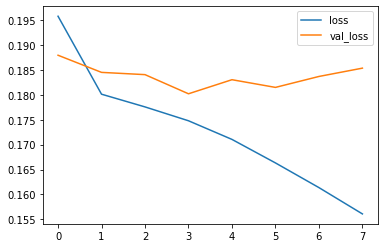

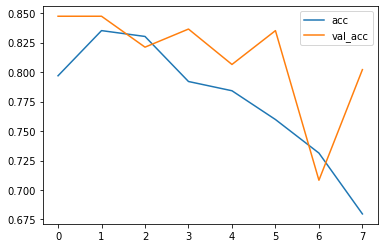

In [24]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()


In [25]:
p = model.predict(x_training)
aucs = []
for j in range(6):
    auc = roc_auc_score(y_training[:,j], p[:,j])
    aucs.append(auc)
print(np.mean(aucs))
print("this sucks")

0.8367109104414738
this sucks


In [27]:
# scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (e[1]*100))

Accuracy: 80.33%
